# Analyse data returned from API searches

Additional data from UNESCO and InCites required. See boxes below.

Code will analyse the API data annd create the figures in the paper and supplementary material.

## Preamble

In [6]:
import pandas as pd
import csv
import sys
import numpy as np
import dataframe_image as dfi
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline  

#pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 20)


print('python :',sys.version)
print('numpy: ',np.__version__)
print('pandas: ',pd.__version__)
print('matplotlib: ',pd.__version__)
print('seaborn: ',sns.__version__)

python : 3.8.8 (default, Apr 13 2021, 12:59:45) 
[Clang 10.0.0 ]
numpy:  1.22.4
pandas:  1.5.3
matplotlib:  1.5.3
seaborn:  0.11.1


In [7]:
#CHANGE LABEL FONTS.....

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rcParams
from matplotlib.ticker import MaxNLocator

plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.constrained_layout.use'] = False
plt.rcParams['axes.formatter.limits'] = (-5,5)
sns.set(rc={'legend.frameon':False})
sns.set_style("whitegrid", {"axes.edgecolor": ".0", "axes.facecolor":"none"})

labelsize = 12
rcParams['xtick.labelsize'] = labelsize
rcParams['ytick.labelsize'] = labelsize 
rcParams['figure.titlesize'] = 24
plt.rc('legend',fontsize=12) # using a size in points
plt.rc('axes', labelsize=labelsize)    # fontsize of the x and y labels

from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker
import math

%matplotlib inline 

In [11]:
isi_colour = [
#"#FF4E3E"
"#CF005B" 
#,"#5E33BF" 
,"#004AFF"
#,"#00C2F2"
,'green'    
,"#12CAC9"
,"goldenrod"
,'pink'
#,"#00B19C"
,"#85F0AD"
#,"#001750" 
,'gold'
,'salmon'
,'#000000'
,"#646363" 
,"#9D9D9C" 
,"#DADADA" 
,"#F0F0F0" 
,"#FFFFFF"] #Will only work for <=15 different things. Above this, another palette is used.

sns.set_palette(isi_colour)
sns.palplot(sns.color_palette())

In [12]:
sam_coast = ['ARGENTINA','BRAZIL','CHILE','URUGUAY','ECUADOR','COLOMBIA','GUYANA','SURINAME','FRENCH GUIANA','PERU','VENEZUELA',]

sam_coast_no_brazil = ['ARGENTINA','CHILE','URUGUAY','ECUADOR','COLOMBIA','GUYANA','SURINAME','FRENCH GUIANA','PERU','VENEZUELA',]

sam_all = ['ARGENTINA','BOLIVIA','BRAZIL','CHILE','URUGUAY','PARAGUAY','ECUADOR','COLOMBIA','GUYANA','SURINAME','FRENCH GUIANA','PERU','VENEZUELA',]

central_mexico_coast = ['PANAMA','COSTA RICA','NICARAGUA','EL SALVADOR','BELIZE','HONDURAS','GUATEMALA','MEXICO']

central_coast = ['PANAMA','COSTA RICA','NICARAGUA','EL SALVADOR','BELIZE','HONDURAS','GUATEMALA']

africa_coast = ['Algeria', 'Angola', 'Benin', 'Cameroon', 
'Cape Verde', 'Comoros', 'CONGO PEOPLES REP', 
'CONGO DEMOCRATIC REPUBLIC', 'Cote Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea', 
'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 
'Liberia', 'Libya', 'Madagascar', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 
'Nigeria', 'Saharawi Arab Democratic Republic', 'Sao Tome and Principe', 'Senegal', 
'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'Sudan', 
'Tanzania', 'Togo', 'Tunisia']

africa_coast = [elem.upper() for elem in africa_coast]

africa_nocoast = ['MALI','BURKINA FASO','NIGER','CHAD','CENTRAL AFRICAN REPUBLIC','SOUTH SUDAN','ETHIOPIA','UGANDA','RWANDA','BURUNDI','ZAMBIA',
                  'ZIMBABWE','BOTSWANA','SWAZILAND','LESOTHO']

africa_nocoast = [elem.upper() for elem in africa_nocoast]

africa_subsah_coast = ['Angola', 'Benin', 'Cameroon', 'Cape Verde', 'Comoros', 'CONGO PEOPLES REP', 'CONGO DEMOCRATIC REPUBLIC', 'Cote Ivoire', 'Djibouti', 'Equatorial Guinea', 
'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Liberia', 'Madagascar', 'Mauritania', 'Mauritius', 'Mozambique', 'Namibia', 
'Nigeria', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'Tanzania', 'Togo']

africa_subsah_coast = [elem.upper() for elem in africa_subsah_coast]

africa_north = ['Saharawi Arab Democratic Republic','Morocco','Libya','Algeria','Tunisia','Egypt','Sudan']

africa_north = [elem.upper() for elem in africa_north]

africa_all = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 
'Cape Verde', 'CENT AFR REPUBL', 'Chad', 'Comoros', 'CONGO PEOPLES REP', 
'CONGO DEMOCRATIC REPUBLIC', 'Cote Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea', 
'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 
'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 
'Niger', 'Nigeria', 'Rwanda', 'Saharawi Arab Democratic Republic', 'Sao Tome and Principe', 'Senegal', 
'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 
'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']

africa_all = [elem.upper() for elem in africa_all]

sids = ['Antigua & Barbuda', 'Guyana', 'Singapore', 'Bahamas', 'Haiti', 'Saint Kitts & Nevis', 'Bahrain', 'Jamaica', 'Saint Lucia',
'Barbados', 'Kiribati', 'Saint Vincent & Grenadines', 'Belize', 'Maldives', 'Seychelles', 'Cape Verde', 'Marshall Islands', 'Solomon Islands', 
'Comoros', 'Micronesia', 'Suriname', 'Cuba', 'Mauritius', 'Timor-Leste', 'Dominica', 'Nauru', 'Tonga', 'Dominican Republic', 'Palau', 
'Trinidad & Tobago', 'Fiji', 'Papua New Guinea', 'Tuvalu', 'Grenada', 'Samoa', 'Vanuatu', 'Guinea-Bissau', 'Sao Tome & Príncipe',
'American Samoa', 'Cook Islands', 'New Caledonia','Anguilla', 'Curacao', 'Niue','Aruba', 'French Polynesia','Puerto Rico',
'Bermuda', 'Guadeloupe', 'Sint Maarten','British Virgin Islands' ,'Guam' , 'Turks & Caicos Islands',
'Cayman Islands', 'Martinique','U.S. Virgin Islands', 'Northern Marianas','Montserrat']

sids = [elem.upper() for elem in sids]


g7 = ['CANADA', 'FRANCE', 'GERMANY', 'ITALY', 'JAPAN', 'UNITED KINGDOM', 'USA']

In [13]:
g20_noeu = ['Argentina', 'Australia', 'Brazil', 'Canada', 'CHINA MAINLAND', 'France', 'Germany', 
       'India', 'Indonesia', 'Italy', 'Japan', 'South Korea', 'Mexico', 'Russia', 'Saudi Arabia', 
       'South Africa', 'Turkey', 'United Kingdom', 'USA']

g20_noeu = [elem.upper() for elem in g20_noeu]

In [1]:
#set all paths here. Edit paths for saved figures when creating them in the code below.

path = ""

In [15]:
ocean_list = ['Arctic','Atlantic','Indian','Pacific','Southern']

# Get additional data from UNESCO website

## GERD

In [ ]:
http://data.uis.unesco.org/index.aspx?queryid=74#

In [16]:
gerd_df = pd.read_csv('{}inputs/GERD_asperc_GDP.csv'.format(path))
gerd_df.rename(columns={'Value':'GERD','TIME':'source_year'},inplace=True)
gerd_df = gerd_df[['Country','GERD','source_year']].drop_duplicates()
gerd_df['Country'] = gerd_df['Country'].str.upper()
gerd_df['GERD'] = gerd_df['GERD'].round(2)
gerd_df

Country  GERD  source_year
0     MIDDLE INCOME COUNTRIES  0.57         2000
1     MIDDLE INCOME COUNTRIES  0.60         2001
2     MIDDLE INCOME COUNTRIES  0.63         2002
3     MIDDLE INCOME COUNTRIES  0.66         2003
4     MIDDLE INCOME COUNTRIES  0.68         2004
...                       ...   ...          ...
2621                   ZAMBIA  0.01         2002
2622                   ZAMBIA  0.01         2003
2623                   ZAMBIA  0.02         2004
2624                   ZAMBIA  0.02         2005
2625                   ZAMBIA  0.28         2008

[2605 rows x 3 columns]

## Researchers per million inhabitants

http://data.uis.unesco.org/index.aspx?queryid=3685

In [17]:
researchers_df = pd.read_csv('{}inputs/researchers_per_million.csv'.format(path))
researchers_df.rename(columns={'Value':'researchers per million','TIME':'source_year'},inplace=True)
researchers_df = researchers_df[['Country','researchers per million','source_year']].drop_duplicates()
researchers_df['Country'] = researchers_df['Country'].str.upper()
researchers_df['researchers per million'] = researchers_df['researchers per million'].round(0)
researchers_df

Country  researchers per million  source_year
0     MIDDLE INCOME COUNTRIES                    356.0         2000
1     MIDDLE INCOME COUNTRIES                    361.0         2001
2     MIDDLE INCOME COUNTRIES                    370.0         2002
3     MIDDLE INCOME COUNTRIES                    379.0         2003
4     MIDDLE INCOME COUNTRIES                    391.0         2004
...                       ...                      ...          ...
2223             SOUTH AFRICA                    518.0         2017
2224             SOUTH AFRICA                    504.0         2018
2225             SOUTH AFRICA                    484.0         2019
2226                   ZAMBIA                     42.0         2008
2227                 ZIMBABWE                    100.0         2012

[2207 rows x 3 columns]

In [18]:
unesco_df = gerd_df.merge(researchers_df,on=['Country','source_year'],how='outer')
unesco_df

Country  GERD  source_year  researchers per million
0     MIDDLE INCOME COUNTRIES  0.57         2000                    356.0
1     MIDDLE INCOME COUNTRIES  0.60         2001                    361.0
2     MIDDLE INCOME COUNTRIES  0.63         2002                    370.0
3     MIDDLE INCOME COUNTRIES  0.66         2003                    379.0
4     MIDDLE INCOME COUNTRIES  0.68         2004                    391.0
...                       ...   ...          ...                      ...
2767                VENEZUELA   NaN         2015                    249.0
2768                VENEZUELA   NaN         2016                    300.0
2769                VENEZUELA   NaN         2019                    237.0
2770                VENEZUELA   NaN         2020                    291.0
2771                 ZIMBABWE   NaN         2012                    100.0

[2772 rows x 4 columns]

## InCites data for country output (all categories)

https://incites.clarivate.com/

In [20]:
"""Filter Summary:			
Dataset: InCites Dataset + ESCI			
Schema:  Web of Science			
Time Period:  [2000, 2020]			
Include Early Access documents:  true			
Document Type:  [Article]			
Funding Data Source:  All Sources			
Location Type:  Country/Region			
Domestic/International Collaboration:  All			
			
Exported date  Oct 11, 2022. 			
InCites dataset updated  2022-09-30. Includes Web of Science content indexed through 2022-08-31. 			"""

incites_df = pd.read_csv('{}inputs/Incites_country_pubs2000_2020.csv'.format(path))
incites_df['Country'] = np.where(incites_df['Country']=='GERMANY (FED REP GER)', 'GERMANY', incites_df['Country'])
incites_df['Country'] = np.where(incites_df['Country']=='CHINA MAINLAND', 'CHINA', incites_df['Country'])

incites_df.head()

Country  articles  source_year  Times Cited  Rank  % Docs Cited  \
0  AFGHANISTAN         5         2003           62     1        100.00   
1  AFGHANISTAN         3         2004           40     1        100.00   
2  AFGHANISTAN        15         2005          436     1         80.00   
3  AFGHANISTAN        17         2006          341     1         76.47   
4  AFGHANISTAN        16         2007          507     1         87.50   

   Category Normalized Citation Impact  
0                             0.396620  
1                             0.362167  
2                             0.907660  
3                             0.606582  
4                             0.821987

## Open extracted API data

In [21]:
df = pd.read_csv('{}../...csv'.format(path))
df.head()

ut                                     doi  source_year  \
0  WOS:000692603100001           10.1080/15740773.2020.1973849         2020   
1  WOS:000681446300002  10.22160/22035184/ARAS-2020-41-2/27-52         2020   
2  WOS:000654346100050             10.1016/j.rsase.2020.100408         2020   
3  WOS:000649388700053           10.1016/j.heliyon.2020.e05444         2020   
4  WOS:000643797700003               10.4038/jnsfsr.v48i4.9256         2020   

  doc_type                                              title  \
0  Article  occupied! a preliminary archaeological examina...   
1  Article  australia in the african century: study of the...   
2  Article  monitoring a tropical super cyclone amphan ove...   
3  Article  mixing of dead sea and red sea waters and chan...   
4  Article  a mini-warm pool during spring in the bay of b...   

                journal                   j20  \
0      J CONFL ARCHAEOL      J CONFL ARCHAEOL   
1  AUSTRALAS REV AFR ST  AUSTRALAS REV AFR ST   
2      REMOTE SENS APPL      REMOTE SENS APPL   
3               HELIYON               HELIYON   
4  J NATL SCI FOUND SRI  J NATL SCI FOUND SRI   

                                            abstract  \
0  the japanese occupation of christmas island in...   
1  in the late 1980s australia crafted itself an ...   
2  a tropical super cyclone amphan was formed ove...   
3  the present work emphasizes on the changes in ...   
4  characteristics of the mini-warm pool (mwp) th...   

                                            keywords  \
0  world war ii|australian territory|christmas is...   
1                                                NaN   
2  super cyclone|flash flooding|satellite remote ...   
3  environmental science|geochemistry|earth scien...   
4  bay of bengal|mini-warm pool|spring inter-monsoon   

                                 woscats  ...         macro_name  \
0                            Archaeology  ...  Arts & Humanities   
1                           Area Studies  ...                NaN   
2  Environmental Sciences|Remote Sensing  ...                NaN   
3             Multidisciplinary Sciences  ...                NaN   
4             Multidisciplinary Sciences  ...                NaN   

        meso_name   micro_name  wos Country EnhancedOrg Country_unique  \
0  Modern History  Philippines  NaN     NaN         NaN            NaN   
1             NaN          NaN  NaN     NaN         NaN            NaN   
2             NaN          NaN  NaN     NaN         NaN            NaN   
3             NaN          NaN  NaN     NaN         NaN            NaN   
4             NaN          NaN  NaN     NaN         NaN            NaN   

  Org_unique article_group international  
0        NaN           NaN           NaN  
1        NaN           NaN           NaN  
2        NaN           NaN           NaN  
3        NaN           NaN           NaN  
4        NaN           NaN           NaN  

[5 rows x 25 columns]

## Make necesssary changes / add in new columns

In [22]:
df['Country'] = np.where(df['Country']=='GERMANY (FED REP GER)', 'GERMANY', df['Country'])
df['Country'] = np.where(df['Country']=='CHINA MAINLAND', 'CHINA', df['Country'])
df['EnhancedOrg'] = np.where(df['EnhancedOrg']=='UNIV W INDIES', 'UNIV WEST INDIES', df['EnhancedOrg'])
df = df[df['EnhancedOrg']!='EGYPTIAN KNOWLEDGE BANK'] #not an institution
df = df[df['EnhancedOrg']!='UDICE FRENCH RES UNIV'] #more of a consortium 
df = df.loc[~((df['EnhancedOrg']=='CSIR') & (df['Country']=='INDIA'))] #CSIR INDIA also an enhancedorg so remove this one 

In [32]:
df['continent'] = ''
df['continent'] = np.where(df['Country'].isin(africa_all),'Africa',df['continent'])
df['continent'] = np.where(df['Country'].isin(sam_all),'South America',df['continent'])
df['continent'] = np.where(df['Country'].isin(central_coast),'Central America',df['continent'])
df.head()

ut                                     doi  source_year  \
0  WOS:000692603100001           10.1080/15740773.2020.1973849         2020   
1  WOS:000681446300002  10.22160/22035184/ARAS-2020-41-2/27-52         2020   
2  WOS:000654346100050             10.1016/j.rsase.2020.100408         2020   
3  WOS:000649388700053           10.1016/j.heliyon.2020.e05444         2020   
4  WOS:000643797700003               10.4038/jnsfsr.v48i4.9256         2020   

  doc_type                                              title  \
0  Article  occupied! a preliminary archaeological examina...   
1  Article  australia in the african century: study of the...   
2  Article  monitoring a tropical super cyclone amphan ove...   
3  Article  mixing of dead sea and red sea waters and chan...   
4  Article  a mini-warm pool during spring in the bay of b...   

                journal                   j20  \
0      J CONFL ARCHAEOL      J CONFL ARCHAEOL   
1  AUSTRALAS REV AFR ST  AUSTRALAS REV AFR ST   
2      REMOTE SENS APPL      REMOTE SENS APPL   
3               HELIYON               HELIYON   
4  J NATL SCI FOUND SRI  J NATL SCI FOUND SRI   

                                            abstract  \
0  the japanese occupation of christmas island in...   
1  in the late 1980s australia crafted itself an ...   
2  a tropical super cyclone amphan was formed ove...   
3  the present work emphasizes on the changes in ...   
4  characteristics of the mini-warm pool (mwp) th...   

                                            keywords  \
0  world war ii|australian territory|christmas is...   
1                                                NaN   
2  super cyclone|flash flooding|satellite remote ...   
3  environmental science|geochemistry|earth scien...   
4  bay of bengal|mini-warm pool|spring inter-monsoon   

                                 woscats  ...       meso_name   micro_name  \
0                            Archaeology  ...  Modern History  Philippines   
1                           Area Studies  ...             NaN          NaN   
2  Environmental Sciences|Remote Sensing  ...             NaN          NaN   
3             Multidisciplinary Sciences  ...             NaN          NaN   
4             Multidisciplinary Sciences  ...             NaN          NaN   

   wos Country EnhancedOrg Country_unique Org_unique article_group  \
0  NaN     NaN         NaN            NaN        NaN           NaN   
1  NaN     NaN         NaN            NaN        NaN           NaN   
2  NaN     NaN         NaN            NaN        NaN           NaN   
3  NaN     NaN         NaN            NaN        NaN           NaN   
4  NaN     NaN         NaN            NaN        NaN           NaN   

  international continent  
0           NaN            
1           NaN            
2           NaN            
3           NaN            
4           NaN            

[5 rows x 26 columns]

In [34]:
df['coastal'] = ''
df['coastal'] = np.where(df['Country'].isin(africa_coast),'Africa',df['coastal'])
df['coastal'] = np.where(df['Country'].isin(sam_coast),'South America',df['coastal'])
df['coastal'] = np.where(df['Country'].isin(central_coast),'Central America',df['coastal'])

In [36]:
df['africa'] = ''
df['africa'] = np.where(df['Country'].isin(africa_subsah_coast),'Sub-Saharan',df['africa'])
df['africa'] = np.where(df['Country'].isin(africa_north),'North',df['africa'])

In [40]:
df['ocean'] = np.where(df['ocean']=='arctic', 'Arctic',df['ocean'])
df['ocean'] = np.where(df['ocean']=='atlantic', 'Atlantic',df['ocean'])
df['ocean'] = np.where(df['ocean']=='indian', 'Indian',df['ocean'])
df['ocean'] = np.where(df['ocean']=='pacific', 'Pacific',df['ocean'])
df['ocean'] = np.where(df['ocean']=='southern', 'Southern',df['ocean'])


# Create Figure 4 - Global share of ocean basin research

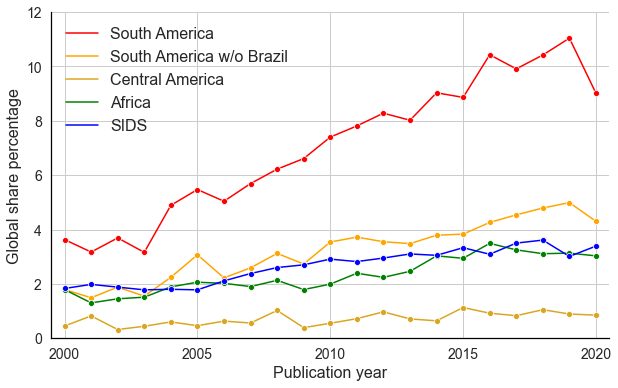

In [270]:
temp_df = pd.DataFrame()
plt.figure(figsize=(10,6))

for lists in [sam_coast,sam_coast_no_brazil,central_coast, africa_coast,sids]:
   
    if 'ARGENTINA' in lists and 'UNITED KINGDOM' not in lists:
        region='South America'
    if 'MOROCCO' in lists:
        region='Africa'
    if 'SINGAPORE' in lists:
        region = 'SIDS'
    if 'CHILE' in lists and 'BRAZIL' not in lists:
        region = 'South America w/o Brazil'
    if 'PANAMA' in lists and 'MEXICO' not in lists:
        region = 'Central America'
    
    temp = (((df[df['Country'].isin(lists)].groupby(['source_year'])['ut'].nunique() 
        / 
        df.groupby(['source_year'])['ut'].nunique()
    )*100).round(2)).reset_index()
    
    temp['region']=region
    
    temp_df = temp_df.append(temp)
    
ax = sns.lineplot(data=temp_df,x='source_year',y='ut',hue='region',palette=['red', 'orange','goldenrod','green','blue'],marker='o')

ax.xaxis.set_major_locator(MaxNLocator(5,integer=True))
sns.despine(top=True, right=True, left=False, bottom=False)

plt.xlabel('Publication year',fontsize=16)
plt.ylabel('Global share percentage',fontsize=16)
plt.legend(fontsize=16) 
plt.ylim(0,12)
plt.xlim(1999.5,2020.5)
plt.savefig('{}...coastal_globalshare.eps'.format(path),dpi=300,bbox_inches='tight')
plt.savefig('{}...coastal_globalshare.png'.format(path),bbox_inches='tight')



# Create Figure 5 - CDF of research output 

In [273]:
# Get the frequency, PDF and CDF for each value in the series


early_years = [2000,2001,2002,2003,2004,2005]
late_years = [2015,2016,2017,2018,2019,2020]
year_list = [early_years,late_years]
stats_df_final = pd.DataFrame()
stats_df_base_final = pd.DataFrame()

for years in year_list:

    year_counts_base = pd.DataFrame((df[df['source_year'].isin(years)]).groupby(['Country'])['ut'].nunique()).reset_index()
    stats_df_base = year_counts_base.groupby('ut')['ut'].agg('count').pipe(pd.DataFrame).rename(columns = {'ut': 'frequency'})
    stats_df_base['pdf'] = stats_df_base['frequency'] / sum(stats_df_base['frequency'])
    stats_df_base['cdf'] = stats_df_base['pdf'].cumsum()
    stats_df_base = stats_df_base.reset_index()
    if 2000 in years:
        stats_df_base['years'] = '2000-2005'
    if 2015 in years:
        stats_df_base['years'] = '2015-2020'
    stats_df_base['region'] = 'Global'
    
    stats_df_base_final = stats_df_base_final.append(stats_df_base)

    for lists in [sam_coast,africa_coast,sids,central_coast]:
            
        year_counts = pd.DataFrame(df[(df['Country'].isin(lists)) & (df['source_year'].isin(years))].groupby(['Country'])['ut'].nunique()).reset_index()
        
        # Frequency
        stats_df = year_counts.groupby('ut')['ut'].agg('count').pipe(pd.DataFrame).rename(columns = {'ut': 'frequency'})
        
        # PDF
        stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

        # CDF
        stats_df['cdf'] = stats_df['pdf'].cumsum()
        stats_df = stats_df.reset_index()
        if 'CHILE' in lists:
            stats_df['region'] = 'South America'
        if 'TUNISIA' in lists:
            stats_df['region'] = 'Africa'
        if 'PANAMA' in lists:
            stats_df['region'] = 'Central America'
        if 'SINGAPORE' in lists:
            stats_df['region'] = 'SIDS'
        if 2000 in years:
            stats_df['years'] = '2000-2005'
        if 2016 in years:
            stats_df['years'] = '2015-2020'

        stats_df_final = stats_df_final.append(stats_df)

stats_df_final

ut  frequency       pdf       cdf           region      years
0     1          1  0.090909  0.090909    South America  2000-2005
1     2          2  0.181818  0.272727    South America  2000-2005
2     3          1  0.090909  0.363636    South America  2000-2005
3     6          1  0.090909  0.454545    South America  2000-2005
4    20          1  0.090909  0.545455    South America  2000-2005
..  ...        ...       ...       ...              ...        ...
1    18          1  0.142857  0.285714  Central America  2015-2020
2    24          2  0.285714  0.571429  Central America  2015-2020
3    28          1  0.142857  0.714286  Central America  2015-2020
4   142          1  0.142857  0.857143  Central America  2015-2020
5   230          1  0.142857  1.000000  Central America  2015-2020

[114 rows x 6 columns]

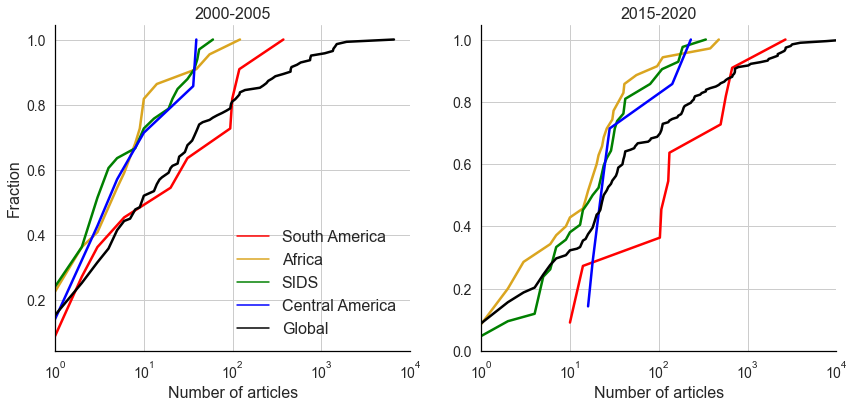

In [275]:
df_plot = stats_df_final.append(stats_df_base_final)

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(14,6),sharex=False,squeeze=False)
fig.subplots_adjust(hspace=0.3)

ax0 = sns.lineplot(data = df_plot[df_plot['years']=='2000-2005'], x = 'ut', y = 'cdf',hue='region',palette=['red', 'goldenrod','green','blue','black'],lw=2.5,ax=axes[0,0])
sns.despine(top=True, right=True, left=False, bottom=False)
ax0.set_xscale('log')
ax0.set_xlim(1,10000)
ax0.set_title('2000-2005',fontsize=16)
ax0.set_xlabel('Number of articles',fontsize=16)
ax0.set_ylabel('Fraction',fontsize=16)  
ax0.legend(fontsize=16) 

ax1 = sns.lineplot(data=df_plot[df_plot['years']=='2015-2020'],x='ut',y='cdf',hue='region',palette=['red', 'goldenrod','green','blue','black'],lw=2.5,ax=axes[0,1],legend=False)
sns.despine(top=True, right=True, left=False, bottom=False)
ax1.set_xscale('log')
ax1.set_xlim(1,10000)
ax1.set_title('2015-2020',fontsize=16)
ax1.set_xlabel('Number of articles',fontsize=16)
ax1.set_ylabel('',fontsize=16)

plt.savefig('{}.../coastal_cdf.eps'.format(path),dpi=300,bbox_inches='tight')
plt.savefig('{}.../coastal_cdf.png'.format(path),bbox_inches='tight')
plt.show()

# Create Figure 1 - yearly output by ocean basin

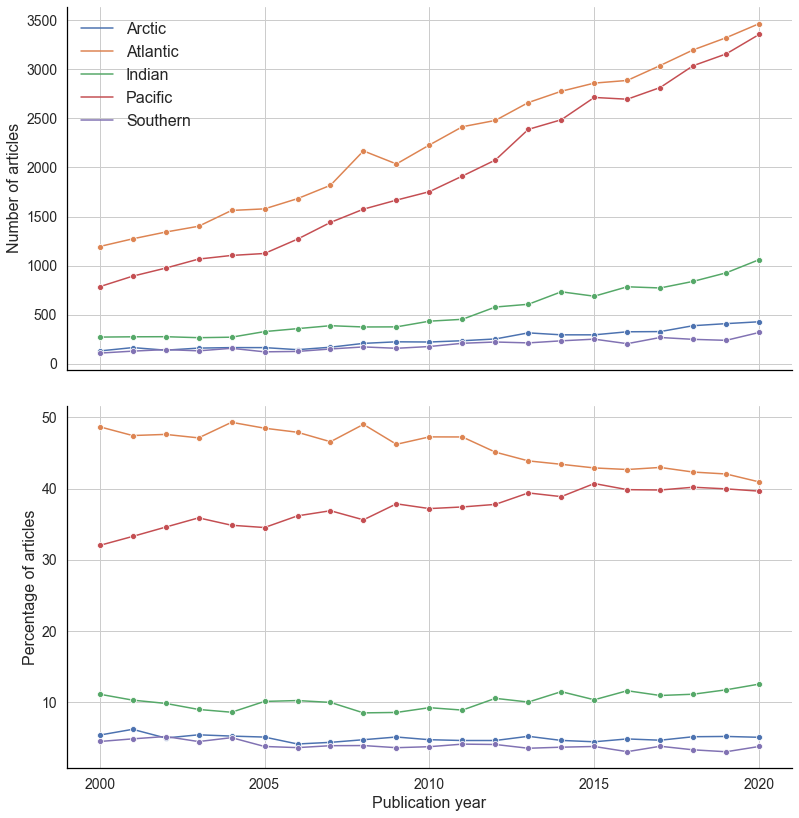

In [59]:
from matplotlib import rcParams
from matplotlib.ticker import MaxNLocator

plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.constrained_layout.use'] = False
plt.rcParams['axes.formatter.limits'] = (-5,5)
sns.set(rc={'legend.frameon':False})
sns.set_style("whitegrid", {"axes.edgecolor": ".0", "axes.facecolor":"none"})

labelsize = 14
rcParams['xtick.labelsize'] = labelsize
rcParams['ytick.labelsize'] = labelsize 
rcParams['figure.titlesize'] = 24
plt.rc('legend',fontsize=12) # using a size in points
plt.rc('axes', labelsize=labelsize)    # fontsize of the x and y labels

import matplotlib.ticker as ticker
import math

fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(13,14),sharex=True,squeeze=False)
fig.subplots_adjust(hspace=0.1)

#AX0
plot_df = df.groupby(['source_year','ocean'])['ut'].nunique().reset_index()

ax0 = sns.lineplot(y='ut',x='source_year',data=plot_df,hue='ocean',marker="o",ax=axes[0,0])

ax0.xaxis.set_major_locator(MaxNLocator(5,integer=True))
sns.despine(top=True, right=True, left=False, bottom=False)
ax0.set_xlabel('Publication year',fontsize=16)
ax0.set_ylabel('Number of articles',fontsize=16)
ax0.legend(fontsize=16) 


a = df.groupby(['source_year','ocean'])['ut'].nunique().reset_index()
b = df.groupby(['source_year'])['ut'].nunique().reset_index()
plotdf = a.merge(b,on='source_year')
plotdf['%'] = ((plotdf['ut_x'] / plotdf['ut_y'])*100).round(2)

ax1 = sns.lineplot(y='%',x='source_year',data=plotdf,hue='ocean',marker="o",ax=axes[1,0],legend=False)

ax1.xaxis.set_major_locator(MaxNLocator(5,integer=True))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1.set_xlabel('Publication year',fontsize=16)
ax1.set_ylabel('Percentage of articles',fontsize=16)

plt.savefig('{}.../ocean_papers_timeseries.eps'.format(path),dpi=300,bbox_inches='tight')
plt.savefig('{}.../ocean_papers_timeseries.png'.format(path),bbox_inches='tight')
plt.show()

In [248]:
country_counts_by_year = df.groupby(['Country','source_year'])['ut'].nunique().sort_values(ascending=False).reset_index()
articles_by_year = df.groupby(['source_year'])['ut'].nunique().sort_values(ascending=False).reset_index()

country_perc_by_year = country_counts_by_year.merge(articles_by_year,on='source_year').rename(columns={'ut_y':'year_count','ut_x':'country_count'})
country_perc_by_year['year_perc'] = ((country_perc_by_year['country_count'] / country_perc_by_year['year_count'])*100).round(2)
country_perc_by_year 

Country  source_year  country_count  year_count  year_perc
0                USA         2019           2291        7896      29.01
1              CHINA         2019           1604        7896      20.31
2     UNITED KINGDOM         2019            683        7896       8.65
3            GERMANY         2019            597        7896       7.56
4             FRANCE         2019            545        7896       6.90
...              ...          ...            ...         ...        ...
2619       LITHUANIA         2000              1        2455       0.04
2620          KUWAIT         2000              1        2455       0.04
2621            MALI         2000              1        2455       0.04
2622       MAURITIUS         2000              1        2455       0.04
2623          MONACO         2000              1        2455       0.04

[2624 rows x 5 columns]

In [249]:
country_counts_by_ocean = df.groupby(['Country','ocean'])['ut'].nunique().sort_values(ascending=False).reset_index().rename(columns={'ut':'ocean papers'})
temp = df.groupby(['Country'])['ut'].nunique().reset_index().rename(columns={'ut':'total papers'})
country_counts_by_ocean = temp.merge(country_counts_by_ocean,on='Country',how='left').fillna(0)
country_counts_by_ocean['perc'] = ((country_counts_by_ocean['ocean papers'] / country_counts_by_ocean['total papers'])*100).round(2)
country_counts_by_ocean

Country  total papers     ocean  ocean papers    perc
0     ALBANIA             5  atlantic             5  100.00
1     ALGERIA            58  atlantic            57   98.28
2     ALGERIA            58   pacific             1    1.72
3     ANDORRA             1  atlantic             1  100.00
4      ANGOLA            19  atlantic            18   94.74
..        ...           ...       ...           ...     ...
567     YEMEN            61    indian            61  100.00
568    ZAMBIA             2   pacific             1   50.00
569    ZAMBIA             2  atlantic             1   50.00
570  ZIMBABWE             5  atlantic             3   60.00
571  ZIMBABWE             5    indian             2   40.00

[572 rows x 5 columns]

In [250]:
country_counts_by_year_ocean = df.groupby(['Country','source_year','ocean'])['ut'].nunique().sort_values(ascending=False).reset_index()
country_counts_by_year_ocean['yearly papers'] = country_counts_by_year_ocean.groupby(['Country','source_year'])['ut'].transform('sum')
country_counts_by_year_ocean['year perc'] = ((country_counts_by_year_ocean['ut'] / country_counts_by_year_ocean['yearly papers'])*100).round(2)
country_counts_by_year_ocean

Country  source_year     ocean    ut  yearly papers  year perc
0        CHINA         2019   pacific  1296           1654      78.36
1        CHINA         2020   pacific  1248           1608      77.61
2        CHINA         2018   pacific  1115           1397      79.81
3          USA         2018  atlantic  1030           2335      44.11
4          USA         2019  atlantic  1004           2345      42.81
...        ...          ...       ...   ...            ...        ...
6072    MEXICO         2015    arctic     1            242       0.41
6073    MEXICO         2016  southern     1            216       0.46
6074    MEXICO         2017    indian     1            297       0.34
6075    MEXICO         2017  southern     1            297       0.34
6076  ZIMBABWE         2020  atlantic     1              1     100.00

[6077 rows x 6 columns]

In [251]:
allpubs_df = incites_df.merge(country_counts_by_year_ocean,on=['Country','source_year'],how='left').fillna(0)
allpubs_df['ocean research perc'] = ((allpubs_df['yearly papers'] / allpubs_df['articles'])*100).round(2)
allpubs_df.rename(columns={'articles':'country articles','yearly papers':'yearly ocean papers'},inplace=True)
allpubs_df = allpubs_df.merge(unesco_df,on=['Country','source_year'],how='left')
allpubs_df

Country  country articles  source_year  Times Cited  Rank  \
0     AFGHANISTAN                 5         2003           62     1   
1     AFGHANISTAN                 3         2004           40     1   
2     AFGHANISTAN                15         2005          436     1   
3     AFGHANISTAN                17         2006          341     1   
4     AFGHANISTAN                16         2007          507     1   
...           ...               ...          ...          ...   ...   
7779     ZIMBABWE               627         2016        19391   215   
7780     ZIMBABWE               710         2017        10363   215   
7781     ZIMBABWE               700         2018         7670   215   
7782     ZIMBABWE               886         2019         7805   215   
7783     ZIMBABWE              1005         2020         6281   215   

      % Docs Cited  Category Normalized Citation Impact     ocean   ut  \
0           100.00                             0.396620         0  0.0   
1           100.00                             0.362167         0  0.0   
2            80.00                             0.907660         0  0.0   
3            76.47                             0.606582         0  0.0   
4            87.50                             0.821987         0  0.0   
...            ...                                  ...       ...  ...   
7779         92.82                             1.865086         0  0.0   
7780         88.59                             1.109389         0  0.0   
7781         86.86                             0.985819  atlantic  1.0   
7782         84.20                             1.082580         0  0.0   
7783         77.91                             0.929089  atlantic  1.0   

      yearly ocean papers  year perc  ocean research perc  GERD  \
0                     0.0        0.0                 0.00   NaN   
1                     0.0        0.0                 0.00   NaN   
2                     0.0        0.0                 0.00   NaN   
3                     0.0        0.0                 0.00   NaN   
4                     0.0        0.0                 0.00   NaN   
...                   ...        ...                  ...   ...   
7779                  0.0        0.0                 0.00   NaN   
7780                  0.0        0.0                 0.00   NaN   
7781                  1.0      100.0                 0.14   NaN   
7782                  0.0        0.0                 0.00   NaN   
7783                  1.0      100.0                 0.10   NaN   

      researchers per million  
0                         NaN  
1                         NaN  
2                         NaN  
3                         NaN  
4                         NaN  
...                       ...  
7779                      NaN  
7780                      NaN  
7781                      NaN  
7782                      NaN  
7783                      NaN  

[7784 rows x 14 columns]

In [258]:
country_list_by_count = df.groupby(['Country'])['ut'].nunique().sort_values(ascending=False).reset_index()
country_list_by_count.head()

Country     ut
0             USA  34512
1           CHINA  12932
2  UNITED KINGDOM  10292
3         GERMANY   7845
4          FRANCE   7841

# Create Figure 2 - yearly output by top 10 publication-producing countries

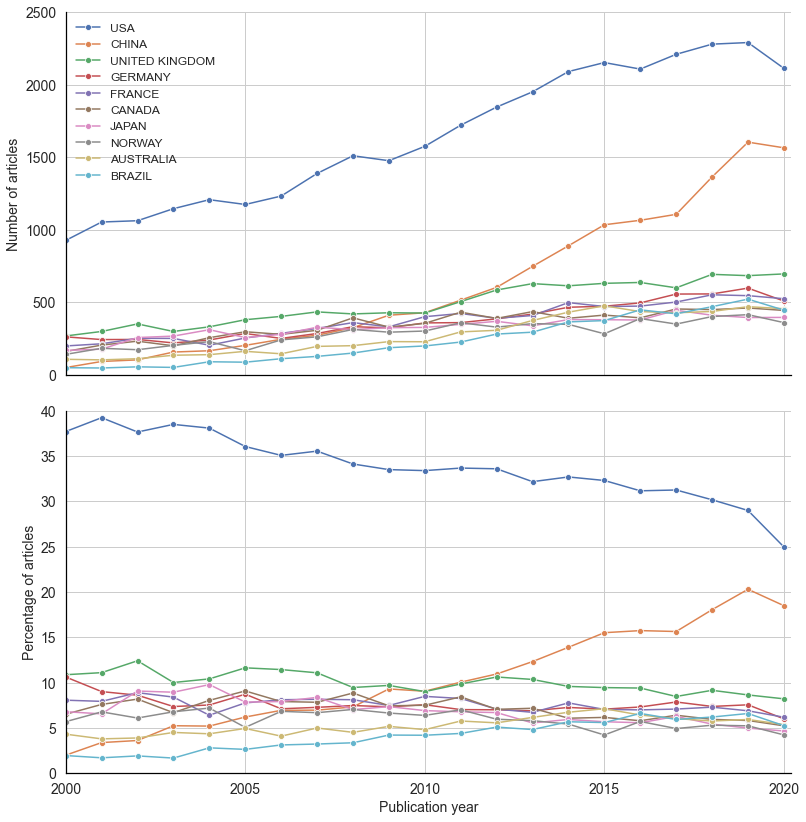

In [253]:
from matplotlib import rcParams
from matplotlib.ticker import MaxNLocator

plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.constrained_layout.use'] = False
plt.rcParams['axes.formatter.limits'] = (-5,5)
sns.set(rc={'legend.frameon':False})
sns.set_style("whitegrid", {"axes.edgecolor": ".0", "axes.facecolor":"none"})

labelsize = 14
rcParams['xtick.labelsize'] = labelsize
rcParams['ytick.labelsize'] = labelsize 
rcParams['figure.titlesize'] = 24
plt.rc('legend',fontsize=12) # using a size in points
plt.rc('axes', labelsize=labelsize)    # fontsize of the x and y labels

import matplotlib.ticker as ticker
import math

fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(13,14),sharex=True,squeeze=False)
fig.subplots_adjust(hspace=0.1)

#AX0
for country in country_list_by_count['Country'][:10]:
    temp = df[(df['Country']==country)]
    temp = temp.groupby(['source_year'])['ut'].nunique().reset_index()
    ax0 = sns.lineplot(x='source_year',y='ut',data=temp,marker='o',label=country,ax=axes[0,0],legend=True)


    ax0.xaxis.set_major_locator(MaxNLocator(5,integer=True))
    sns.despine(top=True, right=True, left=False, bottom=False)
    ax0.set_ylabel ('Number of articles')
    ax0.set_xlabel('')
    ax0.set_xlim(2000,2020.2)
    ax0.set_ylim(0,2500)

for country in country_list_by_count['Country'][:10]:
    temp = country_perc_by_year[country_perc_by_year['Country']==country]
    ax1 = sns.lineplot(x='source_year',y='year_perc',data=temp,marker='o',label=country,ax=axes[1,0],legend=False)

    ax1.xaxis.set_major_locator(MaxNLocator(5,integer=True))
    sns.despine(top=True, right=True, left=False, bottom=False)
    ax1.set_ylabel ('Percentage of articles')
    ax1.set_xlabel('Publication year')
    ax1.set_xlim(2000,2020.2)
    ax1.set_ylim(0,40)


plt.savefig("{}.../country_output.eps".format(path,),bbox_inches='tight',dpi=300)
plt.savefig("{}.../country_output.png".format(path,),bbox_inches='tight')

plt.show()

# Create Supplementary Figure 1 - country output by ocean basin

In [261]:
ocean_list = ['arctic','atlantic','indian','pacific','southern']

<ipython-input-262-72ad191d022c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plotdf['order'] = pd.Categorical(plotdf.Country, ordered=True, categories=top10)


<Figure size 1152x576 with 0 Axes>

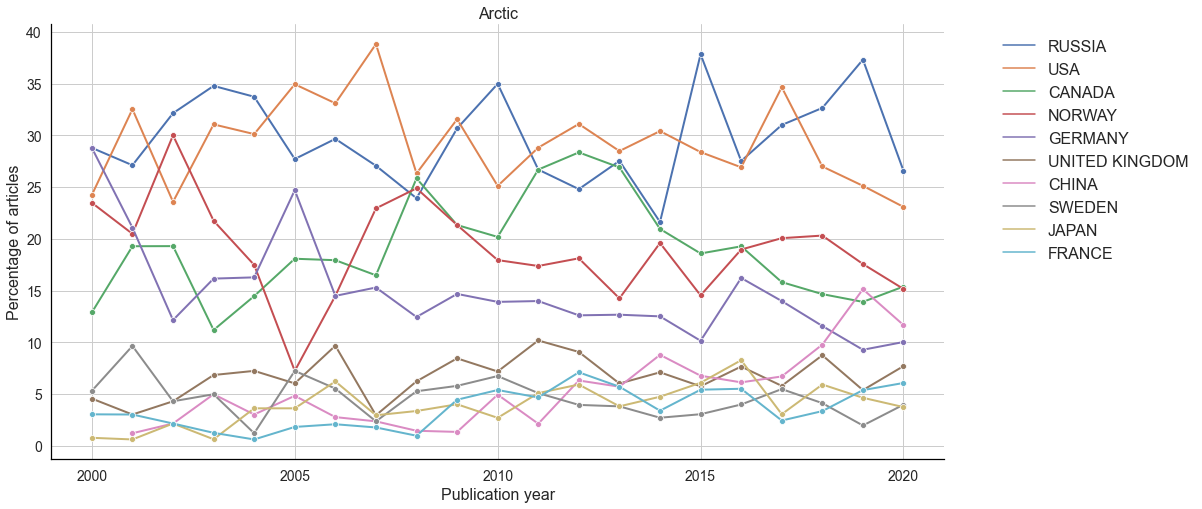

<ipython-input-262-72ad191d022c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plotdf['order'] = pd.Categorical(plotdf.Country, ordered=True, categories=top10)


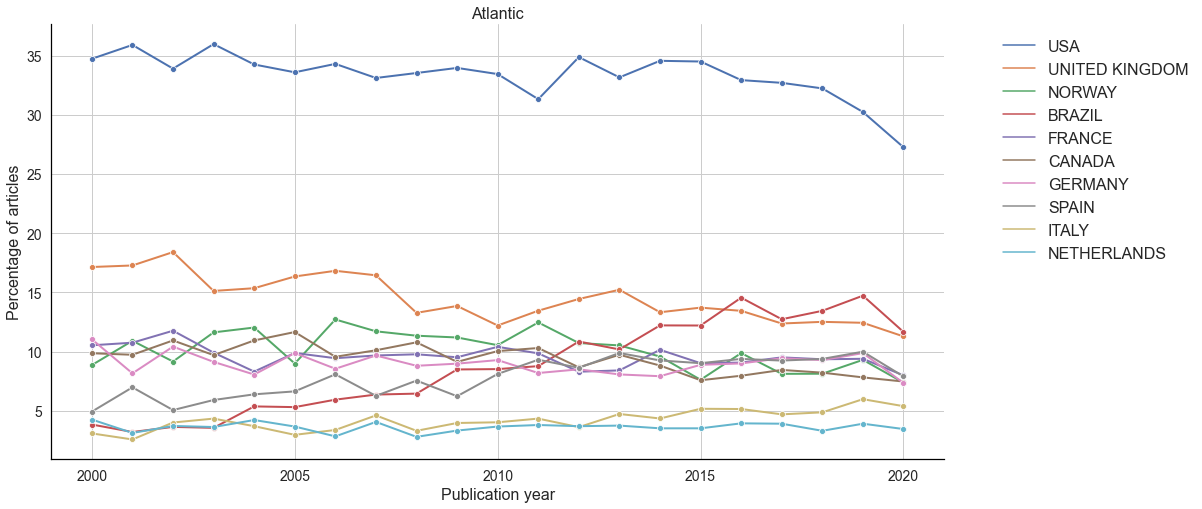

<ipython-input-262-72ad191d022c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plotdf['order'] = pd.Categorical(plotdf.Country, ordered=True, categories=top10)


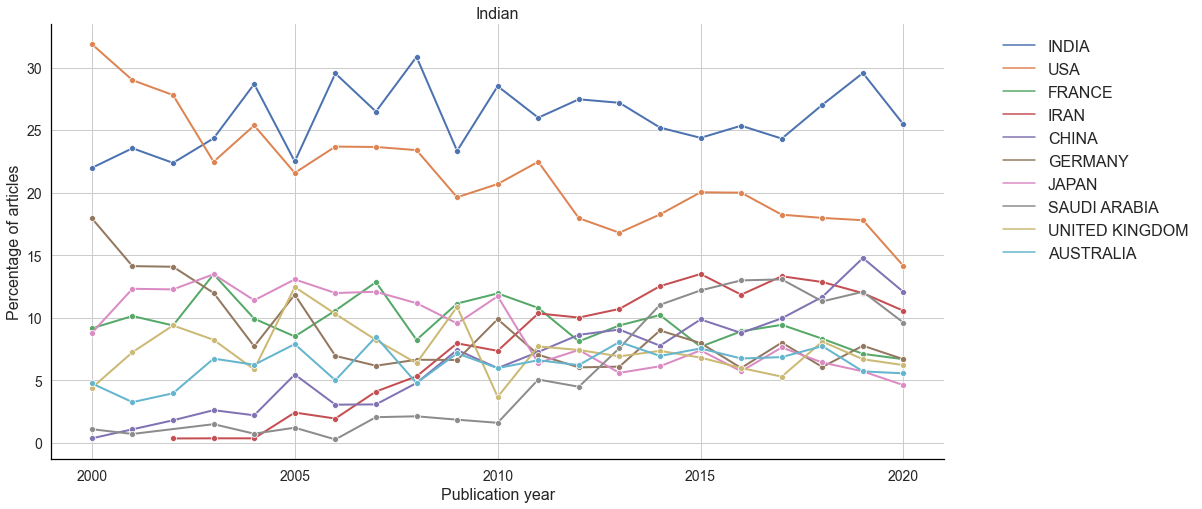

<ipython-input-262-72ad191d022c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plotdf['order'] = pd.Categorical(plotdf.Country, ordered=True, categories=top10)


<ipython-input-262-72ad191d022c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plotdf['order'] = pd.Categorical(plotdf.Country, ordered=True, categories=top10)


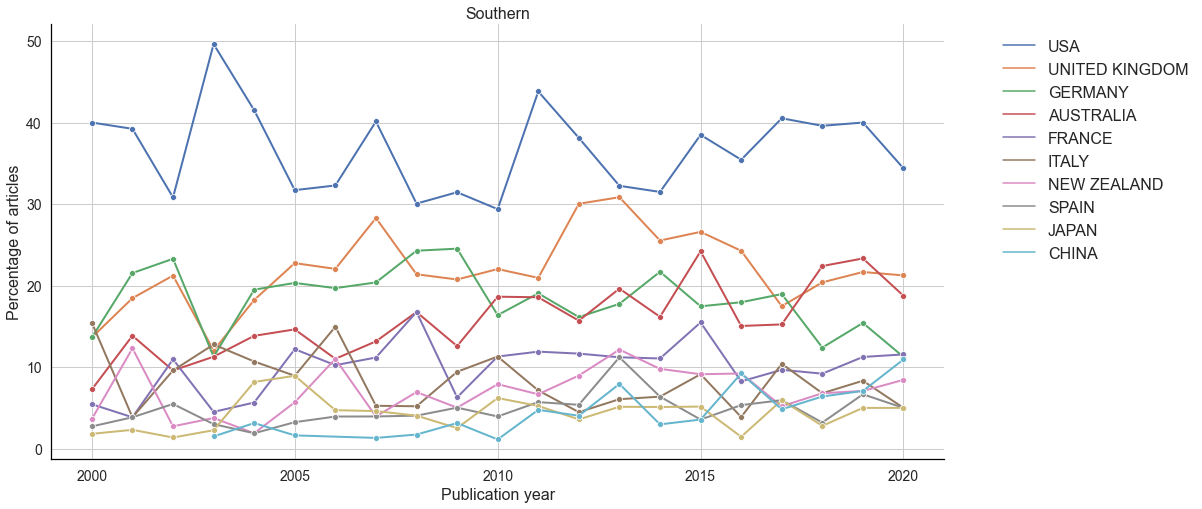

In [262]:
plt.figure(figsize=(16, 8))

a = df.groupby(['ocean','source_year'])['ut'].nunique().reset_index()
b = df.groupby(['ocean','source_year','Country'])['ut'].nunique().reset_index()
c = a.merge(b,on=['source_year','ocean'])
c['ocean %'] = ((c['ut_y'] / c['ut_x'])*100).round(2)

for ocean in ocean_list:
    plt.figure(figsize=(16, 8))
    plotdf = c
    top10 = plotdf[plotdf['ocean']==ocean].groupby(['Country','ocean'])['ut_y'].sum().reset_index().sort_values(by=['ocean','ut_y'],ascending=[True,False]).head(10)['Country'].tolist()
    plotdf = plotdf[(plotdf['ocean']==ocean) &(plotdf['Country'].isin(top10))]
    plotdf['order'] = pd.Categorical(plotdf.Country, ordered=True, categories=top10)
    plotdf = plotdf.sort_values('order')
    
    ax = sns.lineplot(y='ocean %',x='source_year',data=plotdf,hue='Country',marker="o",lw=2)

    ax.xaxis.set_major_locator(MaxNLocator(5,integer=True))
    sns.despine(top=True, right=True, left=False, bottom=False)
    plt.xlabel('Publication year',fontsize=16)
    plt.ylabel('Percentage of articles',fontsize=16)
    plt.legend(bbox_to_anchor=(1.05, 1.0),ncol=1,fontsize=16)
    plt.title('{}'.format(ocean.title()),size=16)

    plt.savefig("{}.../{}_output.eps".format(path,ocean),bbox_inches='tight',dpi=300)
    plt.savefig("{}.../{}_output.png".format(path,ocean),bbox_inches='tight')
    plt.show()

# Create Table 1 - Percentage of ocean basin research by selected countries

In [263]:
from pandas.api.types import CategoricalDtype

g20_noeu = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China Mainland', 'France', 'Germany', 
       'India', 'Indonesia', 'Italy', 'Japan', 'South Korea', 'Mexico', 'Russia', 'Saudi Arabia', 
       'South Africa', 'Turkey', 'United Kingdom', 'USA']

g20_noeu = [elem.upper() for elem in g20_noeu]

g20_noeu_plus_others = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China Mainland', 'France', 'Germany', 
       'India', 'Indonesia', 'Italy', 'Japan', 'Mexico', 'Russia', 'Saudi Arabia', 
       'South Africa','South Korea','Turkey', 'United Kingdom', 'USA','Egypt','Iran','Malaysia','New Zealand','Norway']

g20_noeu_plus_others = [elem.upper() for elem in g20_noeu_plus_others]

country_order = CategoricalDtype(g20_noeu_plus_others,ordered=True)

In [264]:
ocean_by_country = pd.DataFrame()

for ocean in ocean_list:
    temp_df = df[(df['ocean']==ocean)]
    total_papers = temp_df['ut'].nunique()
    temp_df = temp_df.groupby(['Country','ocean','source_year'])['ut'].nunique().reset_index()#.sort_values(by=['source_year'],ascending=False)
    temp_df['country_total'] = temp_df.groupby(['Country','ocean'])['ut'].transform('sum')
    temp_df['total_ocean_papers']=total_papers
    temp_df = temp_df[['Country','country_total','total_ocean_papers']].drop_duplicates().sort_values(by='country_total',ascending=False)
    temp_df['ocean']=ocean
    temp_df['perc'] = ((temp_df['country_total'] / temp_df['total_ocean_papers'])*100).round(2)
    
    ocean_by_country = ocean_by_country.append(temp_df)
    
ocean_by_country.head(10)

Country  country_total  total_ocean_papers   ocean   perc
409          RUSSIA           1547                5185  arctic  29.84
564             USA           1493                5185  arctic  28.79
60           CANADA            981                5185  arctic  18.92
353          NORWAY            960                5185  arctic  18.51
193         GERMANY            718                5185  arctic  13.85
542  UNITED KINGDOM            354                5185  arctic   6.83
85            CHINA            328                5185  arctic   6.33
480          SWEDEN            225                5185  arctic   4.34
288           JAPAN            220                5185  arctic   4.24
172          FRANCE            208                5185  arctic   4.01

In [894]:
temp = ocean_by_country[ocean_by_country['Country'].isin(g20_noeu_plus_others)]
temp['Country'] = temp['Country'].astype(country_order)
temp.sort_values(['Country'])    
    
ocean_by_country_pivot = pd.pivot_table(temp, values = 'perc', index=['Country'], columns = 'ocean').fillna(0).reset_index()

ocean_by_country_pivot.to_excel('{}oceans_paper/figures/g20_heatmap.xlsx'.format(path))

dfi.export(ocean_by_country_pivot.sort_values(['Country']).set_index('Country'
                                    ).style.background_gradient(axis=None,cmap='turbo'),"{}.../g20_heat_perc.png".format(path),max_rows=-1, max_cols=-1)
ocean_by_country_pivot.sort_values(['Country']).set_index('Country').style.background_gradient(axis=None,cmap='turbo')

<ipython-input-894-e0d059e66036>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Country'] = temp['Country'].astype(country_order)


# Create Table 2 - Top institutions (percentage-wise) by ocean basin

In [774]:
inst_ocean_df = pd.DataFrame()

for ocean in ocean_list:
    temp = df[df['ocean']==ocean].groupby(['ocean'])['ut'].nunique().reset_index()#.rename(columns={'ut':'ocean_ut','{}_name'.format(topic):'level_name'})

    temp2 = df[['ut','EnhancedOrg','Country','ocean']].drop_duplicates()
    temp2 = temp2[temp2['ocean']==ocean]
    temp2 = temp2.groupby(['ocean','EnhancedOrg','Country'])['ut'].nunique().reset_index(
    ).sort_values(by='ut',ascending=False)#.rename(columns={'{}_name'.format(topic):'level_name'})#.groupby(['{}_name'.format(topic)]).head(1)

    temp2 = temp2.merge(temp,on='ocean').rename(columns={'ut_x':'org_uts','ut_y':'ocean_uts'})
    temp2['%'] = ((temp2['org_uts'] / temp2['ocean_uts'])*100).round(2)
    
    inst_ocean_df = inst_ocean_df.append(temp2)

inst_ocean_df

ocean                              EnhancedOrg  Country  org_uts  \
0       arctic                         RUSSIAN ACAD SCI   RUSSIA     1083   
1       arctic                          HELMHOLTZ ASSOC  GERMANY      526   
2       arctic             SHIRSHOV INST OCEANOLOGY RAS   RUSSIA      461   
3       arctic   ALFRED WEGENER INST POLAR & MARINE RES  GERMANY      414   
4       arctic                  FISHERIES OCEANS CANADA   CANADA      296   
...        ...                                      ...      ...      ...   
1796  southern                 KALININGRAD DEPT IZMIRAN   RUSSIA        1   
1797  southern  KACHEMAK BAY NATL ESTUARINE RES RESERVE      USA        1   
1798  southern                           JULICH RES CTR  GERMANY        1   
1799  southern              JPL 300-323,4800 OAK GRP DR      USA        1   
1800  southern      ZUEV INST ATMOSPHERIC OPTICS SB RAS   RUSSIA        1   

      ocean_uts      %  
0          5185  20.89  
1          5185  10.14  
2          5185   8.89  
3          5185   7.98  
4          5185   5.71  
...         ...    ...  
1796       4008   0.02  
1797       4008   0.02  
1798       4008   0.02  
1799       4008   0.02  
1800       4008   0.02  

[38816 rows x 6 columns]

In [775]:
inst_ocean_df.groupby(['ocean']).head(5)

ocean                             EnhancedOrg         Country  org_uts  \
0    arctic                        RUSSIAN ACAD SCI          RUSSIA     1083   
1    arctic                         HELMHOLTZ ASSOC         GERMANY      526   
2    arctic            SHIRSHOV INST OCEANOLOGY RAS          RUSSIA      461   
3    arctic  ALFRED WEGENER INST POLAR & MARINE RES         GERMANY      414   
4    arctic                 FISHERIES OCEANS CANADA          CANADA      296   
0  atlantic                                    CNRS          FRANCE     2588   
1  atlantic   NOAA (NATL OCEANIC ATMOSPHERIC ADMIN)             USA     1910   
2  atlantic                         HELMHOLTZ ASSOC         GERMANY     1627   
3  atlantic                  STATE UNIV SYS FLORIDA             USA     1372   
4  atlantic                     UNIV BRETAGNE LOIRE          FRANCE     1313   
0    indian                              CSIR INDIA           INDIA      921   
1    indian                        MINIST EARTH SCI           INDIA      814   
2    indian                       NATL INST OCEANOG           INDIA      809   
3    indian                                    CNRS          FRANCE      641   
4    indian                    DEPT SPACE GOV INDIA           INDIA      503   
0   pacific                        CHINESE ACAD SCI  CHINA MAINLAND     4446   
1   pacific   NOAA (NATL OCEANIC ATMOSPHERIC ADMIN)             USA     2498   
2   pacific                       UNIV CALIF SYSTEM             USA     2283   
3   pacific                        OCEAN UNIV CHINA  CHINA MAINLAND     1566   
4   pacific                   UNIV CHINESE ACAD SCI  CHINA MAINLAND     1527   
0  southern                         HELMHOLTZ ASSOC         GERMANY      475   
1  southern          NERC NATL ENVIRONM RES COUNCIL  UNITED KINGDOM      444   
2  southern                                    UKRI  UNITED KINGDOM      444   
3  southern           NERC BRITISH ANTARCTIC SURVEY  UNITED KINGDOM      433   
4  southern  ALFRED WEGENER INST POLAR & MARINE RES         GERMANY      403   

   ocean_uts      %  
0       5185  20.89  
1       5185  10.14  
2       5185   8.89  
3       5185   7.98  
4       5185   5.71  
0      47368   5.46  
1      47368   4.03  
2      47368   3.43  
3      47368   2.90  
4      47368   2.77  
0      11079   8.31  
1      11079   7.35  
2      11079   7.30  
3      11079   5.79  
4      11079   4.54  
0      40275  11.04  
1      40275   6.20  
2      40275   5.67  
3      40275   3.89  
4      40275   3.79  
0       4008  11.85  
1       4008  11.08  
2       4008  11.08  
3       4008  10.80  
4       4008  10.05

# Create Table 3 - Institutions with the highest percentage of their country's output

In [905]:
inst_highest_perc = df[['ut','EnhancedOrg','Country']].drop_duplicates().groupby(['Country','EnhancedOrg'])['ut'].nunique(
).reset_index().sort_values(by=['Country','ut'],ascending=[True,False])


temp2 = df[['ut','Country']].drop_duplicates().groupby(['Country'])['ut'].nunique(
).reset_index()

inst_highest_perc = inst_highest_perc.merge(temp2,on='Country').rename(columns={'ut_x':'org_uts','ut_y':'country_uts'})
inst_highest_perc['%'] = ((inst_highest_perc['org_uts'] / inst_highest_perc['country_uts'])*100).round(2)

inst_highest_perc[inst_highest_perc['country_uts']>100].sort_values(by='%',ascending=False).head(25)

Country                                    EnhancedOrg  \
10710          GREENLAND                   GREENLAND INST NAT RESOURCES   
13166            JAMAICA                               UNIV WEST INDIES   
17874             PANAMA                               SMITHSONIAN INST   
17875             PANAMA                      SMITHSONIAN TROP RES INST   
1381            BARBADOS                               UNIV WEST INDIES   
18661             RUSSIA                               RUSSIAN ACAD SCI   
22195  TRINIDAD & TOBAGO                               UNIV WEST INDIES   
1648             BERMUDA                         BERMUDA INST OCEAN SCI   
6995          COSTA RICA                                UNIV COSTA RICA   
70             ARGENTINA               CONSEJO NACL INVEST CIENT & TECN   
8109              FRANCE                                           CNRS   
23724            URUGUAY                            UNIV REPUBL URUGUAY   
19627          SINGAPORE                            NATL UNIV SINGAPORE   
7969                FIJI                                 UNIV S PACIFIC   
7301      CZECH REPUBLIC                                 CZECH ACAD SCI   
16430      NEW CALEDONIA             INST RECHERCHE DEVELOPPEMENT (IRD)   
18204             POLAND                                POLISH ACAD SCI   
22434            UKRAINE                          NATL ACAD SCI UKRAINE   
10624             GREECE                        HELLENIC CTR MARINE RES   
1230             AUSTRIA                                    UNIV VIENNA   
21465        SWITZERLAND  SWISS FEDERAL INSTITUTES OF TECHNOLOGY DOMAIN   
10880            ICELAND                                   UNIV ICELAND   
9591             GERMANY                                HELMHOLTZ ASSOC   
19817       SOUTH AFRICA                                 UNIV CAPE TOWN   
7139             CROATIA        INST ZA OCEANOGRAFIJU I RIBARSTVO SPLIT   

       org_uts  country_uts      %  
10710      101          105  96.19  
13166      213          269  79.18  
17874      231          308  75.00  
17875      230          308  74.68  
1381       169          227  74.45  
18661     3268         4433  73.72  
22195      259          370  70.00  
1648       124          189  65.61  
6995       269          432  62.27  
70         647         1043  62.03  
8109      4784         7841  61.01  
23724      117          193  60.62  
19627      357          606  58.91  
7969       178          318  55.97  
7301       121          227  53.30  
16430      219          428  51.17  
18204      221          450  49.11  
22434       50          103  48.54  
10624      254          534  47.57  
1230       221          482  45.85  
21465      489         1134  43.12  
10880      213          496  42.94  
9591      3282         7845  41.84  
19817      404          969  41.69  
7139        56          135  41.48

# Create Figure 3 - Global collaboration network

In [37]:
country_list = df['Country'].unique().tolist()

In [38]:
all_papers = df.groupby('Country')['ut'].nunique().reset_index().rename(columns={'ut':'total papers'})
collab_papers = df[df['Country_unique']>=2].groupby(['Country'])['ut'].nunique().reset_index().rename(columns={'ut':'international collaborative papers'})

collab_perc_df = all_papers.merge(collab_papers)
collab_perc_df['total collaboration %'] = ((collab_perc_df['international collaborative papers'] / collab_perc_df['total papers'])*100).round(2)
collab_perc_df

Country  total papers  international collaborative papers  \
0              ALBANIA             5                                   5   
1              ALGERIA            58                                  47   
2              ANDORRA             1                                   1   
3               ANGOLA            19                                  19   
4    ANTIGUA & BARBUDA            19                                  15   
..                 ...           ...                                 ...   
192          VENEZUELA           253                                 193   
193            VIETNAM           239                                 216   
194              YEMEN            61                                  54   
195             ZAMBIA             2                                   2   
196           ZIMBABWE             5                                   5   

     total collaboration %  
0                   100.00  
1                    81.03  
2                   100.00  
3                   100.00  
4                    78.95  
..                     ...  
192                  76.28  
193                  90.38  
194                  88.52  
195                 100.00  
196                 100.00  

[197 rows x 4 columns]

In [39]:
collaboration_df = pd.DataFrame()

for country in country_list:
    tempdf = df[df['Country_unique']>=2]
    listofuts = tempdf[tempdf['Country']==country]['ut'].unique().tolist()
    tempdf = df[df['ut'].isin(listofuts)]
    tempdf = tempdf[tempdf['Country']!=country]
    tempdf = tempdf.groupby(['Country'])['ut'].nunique().reset_index()
    tempdf['main_country_total'] = len(listofuts)
    tempdf['main_country']=country
    tempdf['perc'] = ((tempdf['ut'] / tempdf['main_country_total'])*100).round(2)
    tempdf.rename(columns={'Country':'collaborator','ut':'collaborating_papers'},inplace=True)
    tempdf = tempdf[['main_country','main_country_total','collaborator','collaborating_papers','perc']]
    
    collaboration_df = collaboration_df.append(tempdf)
    
    
collaboration_df[collaboration_df['main_country_total']>=50].sort_values(by='perc',ascending=False).head(20)

main_country  main_country_total    collaborator  \
52                BERMUDA                 182             USA   
17                  MALTA                  78           ITALY   
21   NETHERLANDS ANTILLES                  59     NETHERLANDS   
0         SOLOMON ISLANDS                  61       AUSTRALIA   
80     DOMINICAN REPUBLIC                  86             USA   
1        PAPUA NEW GUINEA                  61       AUSTRALIA   
82                 PANAMA                 290             USA   
21                TUNISIA                 170          FRANCE   
3               GREENLAND                 103         DENMARK   
16          NEW CALEDONIA                 395          FRANCE   
9              SEYCHELLES                  73          FRANCE   
1                    FIJI                 237       AUSTRALIA   
22                MOROCCO                 177          FRANCE   
0                 VANUATU                  56       AUSTRALIA   
66                  EGYPT                 469    SAUDI ARABIA   
107                MEXICO                1700             USA   
14               PAKISTAN                 112           CHINA   
67                IRELAND                 522  UNITED KINGDOM   
133                CANADA                4278             USA   
54               BARBADOS                 146             USA   

     collaborating_papers   perc  
52                    159  87.36  
17                     61  78.21  
21                     44  74.58  
0                      42  68.85  
80                     58  67.44  
1                      41  67.21  
82                    188  64.83  
21                    108  63.53  
3                      64  62.14  
16                    242  61.27  
9                      44  60.27  
1                     140  59.07  
22                    102  57.63  
0                      32  57.14  
66                    260  55.44  
107                   932  54.82  
14                     57  50.89  
67                    265  50.77  
133                  2171  50.75  
54                     74  50.68

In [40]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from pyvis import network as net

data = collaboration_df[collaboration_df['collaborating_papers']>=100].sort_values(by='main_country')

g = nx.from_pandas_edgelist(df=data, source='main_country', target='collaborator',edge_attr='collaborating_papers') 

durations = [i['collaborating_papers'] for i in dict(g.edges).values()]

labels = [i for i in dict(g.nodes).keys()]

totpapers = data[['main_country','main_country_total']].drop_duplicates()
totpapers['main_country'] = pd.Categorical(totpapers.main_country, categories = labels, ordered = True)
totpapers = totpapers.sort_values(by='main_country')
d = totpapers.set_index('main_country')['main_country_total'].to_dict()
    
labels = {i:i for i in dict(g.nodes).keys()}

nodesize = [i for i in dict(d).values()]


colors = []
for node in g:
    if node in sids:
        colors.append("greenyellow")
    elif node in africa_all:
        colors.append("cyan")
    elif node in sam_all:
        colors.append("violet")  
    elif node in g7:
        colors.append("coral")
    else: 
        colors.append("khaki")


#https://stackoverflow.com/questions/52400380/assign-edge-weights-to-a-networkx-graph-using-pandas-dataframe    
fig, ax = plt.subplots(figsize=(18,15))
pos = nx.spring_layout(g,k=0.7, iterations=19)
nx.draw_networkx_nodes(g, pos, ax = ax, node_color=colors,node_size=nodesize)
nx.draw_networkx_edges(g, pos, width=np.log(durations), ax=ax,edge_color='lightblue')
_ = nx.draw_networkx_labels(g, pos, labels, ax=ax,font_size=12,font_color='black')
plt.axis('off')

ax.collections[0].set_edgecolor("#FF0000") 

plt.savefig("{}.../all_collaborations_gt100.eps".format(path), dpi=300,bbox_inches='tight')
plt.savefig("{}.../all_collaborations_gt100.png".format(path),bbox_inches="tight")

plt.show()

{'ARGENTINA': 'ARGENTINA', 'USA': 'USA', 'BRAZIL': 'BRAZIL', 'AUSTRALIA': 'AUSTRALIA', 'UNITED KINGDOM': 'UNITED KINGDOM', 'THAILAND': 'THAILAND', 'TAIWAN': 'TAIWAN', 'SWITZERLAND': 'SWITZERLAND', 'CANADA': 'CANADA', 'SPAIN': 'SPAIN', 'SOUTH KOREA': 'SOUTH KOREA', 'SOUTH AFRICA': 'SOUTH AFRICA', 'SINGAPORE': 'SINGAPORE', 'PHILIPPINES': 'PHILIPPINES', 'NEW ZEALAND': 'NEW ZEALAND', 'NEW CALEDONIA': 'NEW CALEDONIA', 'NORWAY': 'NORWAY', 'NETHERLANDS': 'NETHERLANDS', 'MALAYSIA': 'MALAYSIA', 'JAPAN': 'JAPAN', 'ITALY': 'ITALY', 'INDONESIA': 'INDONESIA', 'INDIA': 'INDIA', 'GERMANY': 'GERMANY', 'FRANCE': 'FRANCE', 'FIJI': 'FIJI', 'CHINA': 'CHINA', 'AUSTRIA': 'AUSTRIA', 'BELGIUM': 'BELGIUM', 'BERMUDA': 'BERMUDA', 'MEXICO': 'MEXICO', 'PORTUGAL': 'PORTUGAL', 'SWEDEN': 'SWEDEN', 'RUSSIA': 'RUSSIA', 'DENMARK': 'DENMARK', 'CHILE': 'CHILE', 'COLOMBIA': 'COLOMBIA', 'COSTA RICA': 'COSTA RICA', 'EGYPT': 'EGYPT', 'SAUDI ARABIA': 'SAUDI ARABIA', 'FINLAND': 'FINLAND', 'TUNISIA': 'TUNISIA', 'MOROCCO': 'MOROC

# Create Supplementary Figure 2 - Global collaboration network (>= 15 collaborations)

{'ALGERIA': 'ALGERIA', 'FRANCE': 'FRANCE', 'ITALY': 'ITALY', 'ARGENTINA': 'ARGENTINA', 'MEXICO': 'MEXICO', 'PERU': 'PERU', 'JAPAN': 'JAPAN', 'GERMANY': 'GERMANY', 'COLOMBIA': 'COLOMBIA', 'CHILE': 'CHILE', 'NEW ZEALAND': 'NEW ZEALAND', 'SOUTH AFRICA': 'SOUTH AFRICA', 'SPAIN': 'SPAIN', 'BRAZIL': 'BRAZIL', 'AUSTRALIA': 'AUSTRALIA', 'SWITZERLAND': 'SWITZERLAND', 'UNITED KINGDOM': 'UNITED KINGDOM', 'URUGUAY': 'URUGUAY', 'USA': 'USA', 'CANADA': 'CANADA', 'AUSTRIA': 'AUSTRIA', 'CAMBODIA': 'CAMBODIA', 'BELGIUM': 'BELGIUM', 'TAIWAN': 'TAIWAN', 'BANGLADESH': 'BANGLADESH', 'THAILAND': 'THAILAND', 'TURKEY': 'TURKEY', 'UNITED ARAB EMIRATES': 'UNITED ARAB EMIRATES', 'VANUATU': 'VANUATU', 'VENEZUELA': 'VENEZUELA', 'VIETNAM': 'VIETNAM', 'SRI LANKA': 'SRI LANKA', 'TONGA': 'TONGA', 'SWEDEN': 'SWEDEN', 'SINGAPORE': 'SINGAPORE', 'CHINA': 'CHINA', 'NORWAY': 'NORWAY', 'PAKISTAN': 'PAKISTAN', 'PANAMA': 'PANAMA', 'NETHERLANDS': 'NETHERLANDS', 'SOUTH KOREA': 'SOUTH KOREA', 'PAPUA NEW GUINEA': 'PAPUA NEW GUINEA

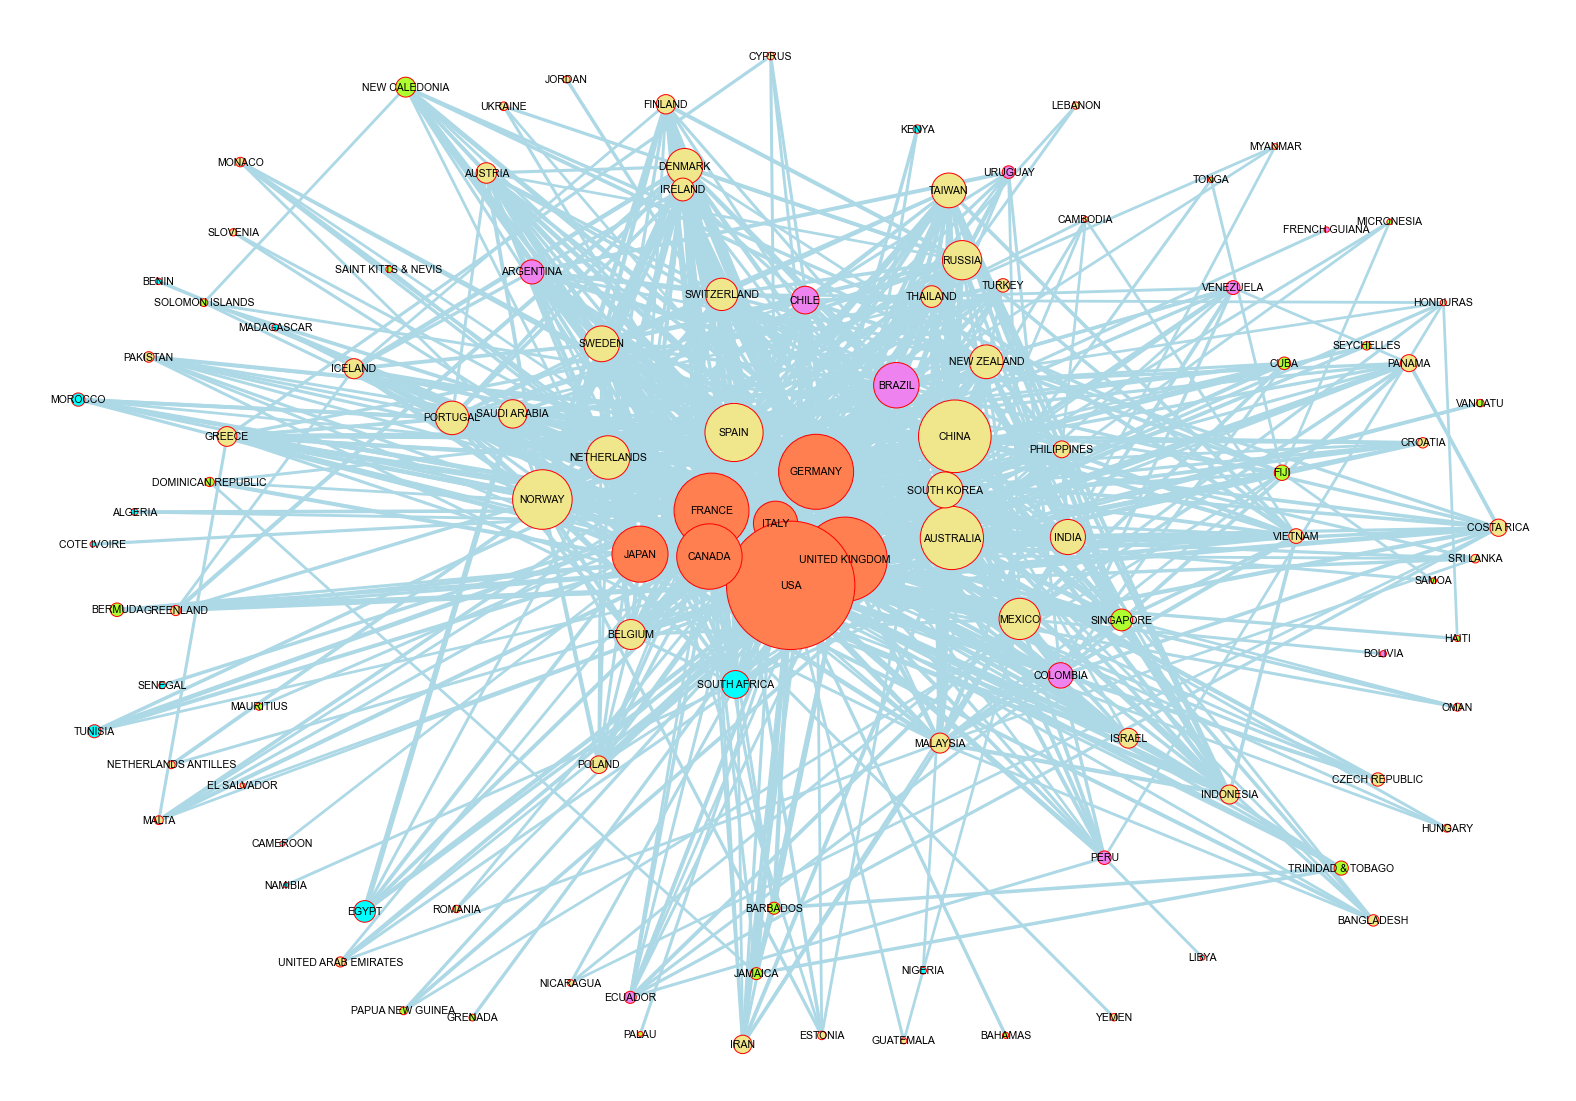

In [212]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from pyvis import network as net


data = collaboration_df[collaboration_df['collaborating_papers']>=15].sort_values(by='main_country')

g = nx.from_pandas_edgelist(df=data, source='main_country', target='collaborator',edge_attr='collaborating_papers') 

durations = [i['collaborating_papers'] for i in dict(g.edges).values()]

labels = [i for i in dict(g.nodes).keys()]

totpapers = data[['main_country','main_country_total']].drop_duplicates()
totpapers['main_country'] = pd.Categorical(totpapers.main_country, categories = labels, ordered = True)
totpapers = totpapers.sort_values(by='main_country')
d = totpapers.set_index('main_country')['main_country_total'].to_dict()
    
labels = {i:i for i in dict(g.nodes).keys()}

nodesize = [i for i in dict(d).values()]

colors = []
for node in g:
    if node in sids:
        colors.append("greenyellow")
    elif node in africa_all:
        colors.append("cyan")
    elif node in sam_all:
        colors.append("violet")  
    elif node in g7:
        colors.append("coral")
    else: 
        colors.append("khaki")


#https://stackoverflow.com/questions/52400380/assign-edge-weights-to-a-networkx-graph-using-pandas-dataframe    
fig, ax = plt.subplots(figsize=(28,20))
pos = nx.spring_layout(g,k=0.8, iterations=20)
nx.draw_networkx_nodes(g, pos, ax = ax, node_color=colors,node_size=nodesize)
nx.draw_networkx_edges(g, pos, width=np.log(durations), ax=ax,edge_color='lightblue')
_ = nx.draw_networkx_labels(g, pos, labels, ax=ax,font_size=10.5,font_color='black')
plt.axis('off')

ax.collections[0].set_edgecolor("#FF0000") 

plt.savefig("{}...all_collaborations_gt15.eps".format(path), dpi=300,bbox_inches='tight')
plt.savefig("{}.../all_collaborations_gt15.png".format(path),bbox_inches="tight")

plt.show()

# Create Supplementary Figure 3 - Collaboration networks by ocean basin

In [268]:
ocean_collaboration_df = pd.DataFrame()

for country in country_list:
    for ocean in ocean_list:
        tempdf = df[(df['Country_unique']>=2)  & (df['ocean']==ocean)]
        listofuts = tempdf[tempdf['Country']==country]['ut'].unique().tolist()
        tempdf = df[df['ut'].isin(listofuts)]
        tempdf = tempdf[tempdf['Country']!=country]
        tempdf = tempdf.groupby(['Country'])['ut'].nunique().reset_index()
        tempdf['main_country_total'] = len(listofuts)
        tempdf['main_country']=country
        tempdf['ocean']=ocean
        tempdf['perc'] = ((tempdf['ut'] / tempdf['main_country_total'])*100).round(2)
        tempdf.rename(columns={'Country':'collaborator','ut':'collaborating_papers'},inplace=True)
        tempdf = tempdf[['ocean','main_country','main_country_total','collaborator','collaborating_papers','perc']]

        ocean_collaboration_df = ocean_collaboration_df.append(tempdf)

country_totals = ocean_collaboration_df[['main_country','ocean','main_country_total']].drop_duplicates().sort_values(by='main_country'
                                        ).groupby(['main_country'])['main_country_total'].sum().reset_index().rename(columns={'main_country_total':'main_country_oceans_total'})

ocean_collaboration_df = ocean_collaboration_df.merge(country_totals,on='main_country')
ocean_collaboration_df['ocean_perc'] = ((ocean_collaboration_df['main_country_total'] / ocean_collaboration_df['main_country_oceans_total'])*100).round(2)

ocean_collaboration_df = ocean_collaboration_df[['ocean','main_country','main_country_oceans_total','ocean_perc','main_country_total','collaborator','collaborating_papers','perc']]
ocean_collaboration_df[ocean_collaboration_df['main_country_total']>=50].sort_values(by='perc',ascending=False)

ocean          main_country  main_country_oceans_total  ocean_perc  \
13650  atlantic               BERMUDA                        186       67.20   
14310  atlantic                 MALTA                         78       97.44   
5826    pacific              PAKISTAN                        116       51.72   
15155  atlantic  NETHERLANDS ANTILLES                         59      100.00   
12631  atlantic                PANAMA                        302       53.97   
...         ...                   ...                        ...         ...   
3023   atlantic                   USA                      16946       39.92   
3022   atlantic                   USA                      16946       39.92   
3019   atlantic                   USA                      16946       39.92   
3199    pacific                   USA                      16946       40.79   
3058   atlantic                   USA                      16946       39.92   

       main_country_total collaborator  collaborating_papers   perc  
13650                 125          USA                   108  86.40  
14310                  76        ITALY                    61  80.26  
5826                   60        CHINA                    46  76.67  
15155                  59  NETHERLANDS                    44  74.58  
12631                 163          USA                   120  73.62  
...                   ...          ...                   ...    ...  
3023                 6765        LIBYA                     1   0.01  
3022                 6765      LIBERIA                     1   0.01  
3019                 6765   KAZAKHSTAN                     1   0.01  
3199                 6913     DOMINICA                     1   0.01  
3058                 6765        SAMOA                     1   0.01  

[10506 rows x 8 columns]

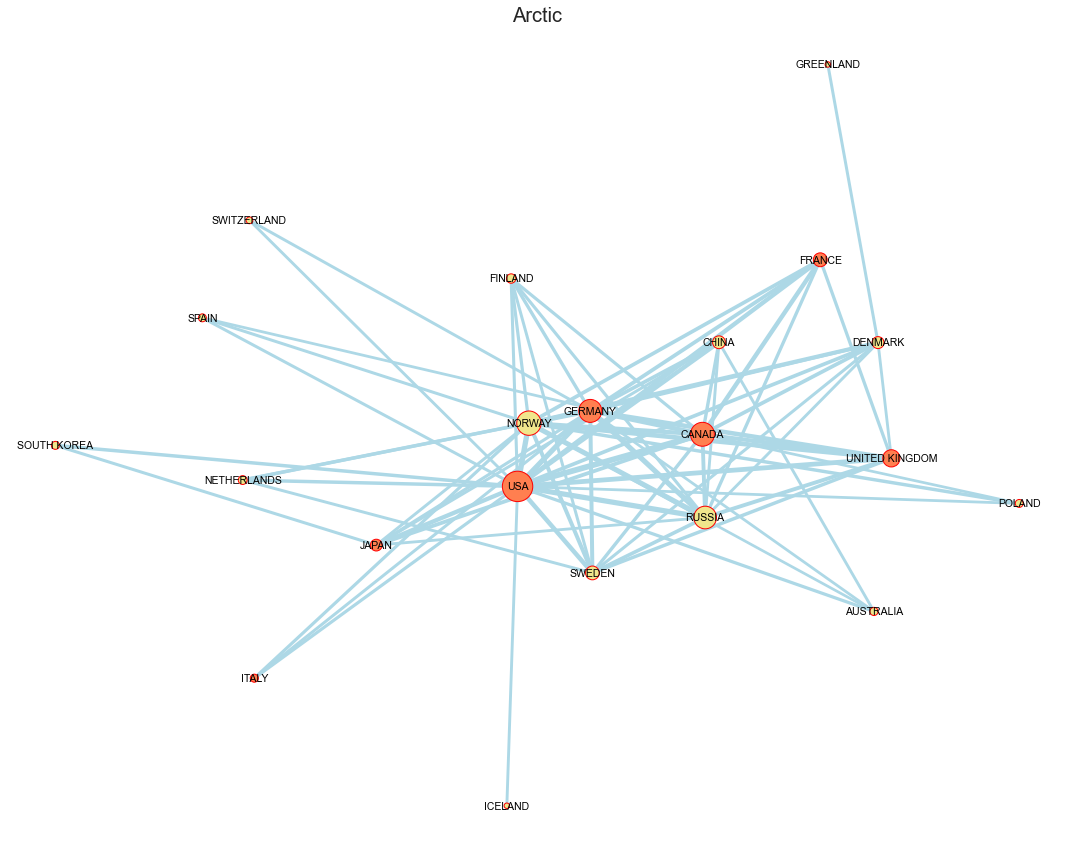

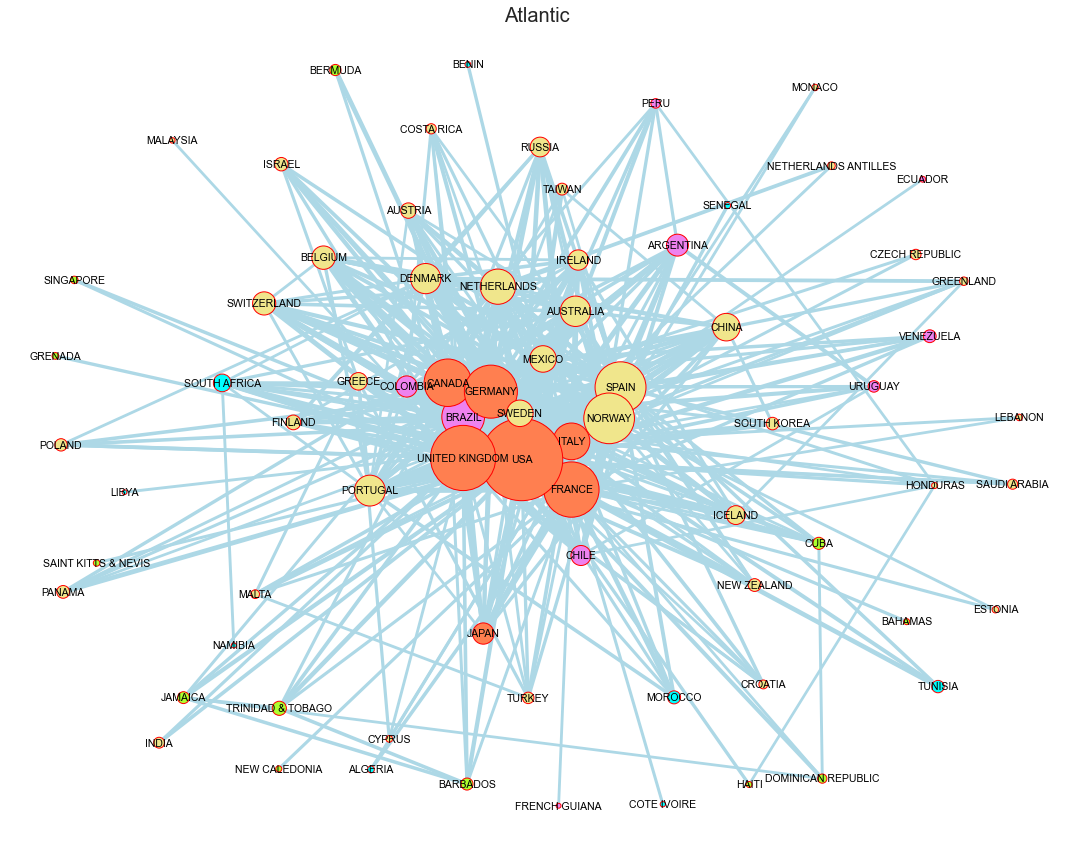

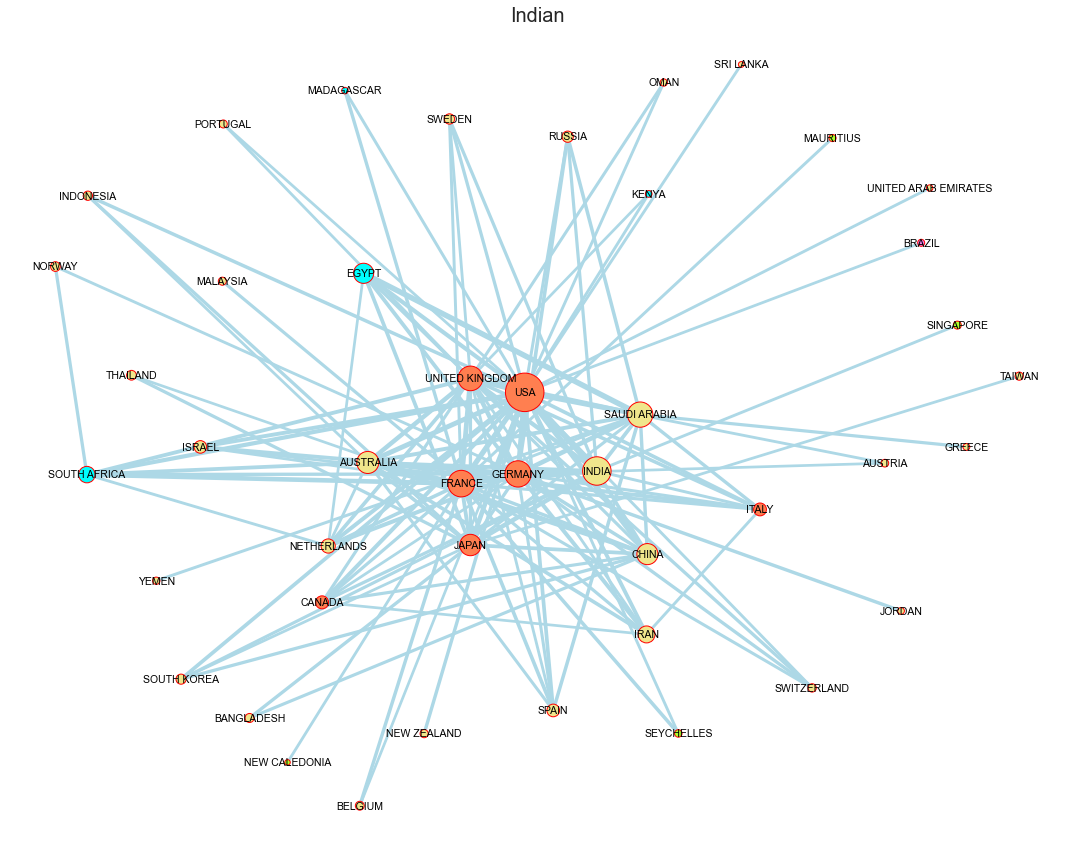

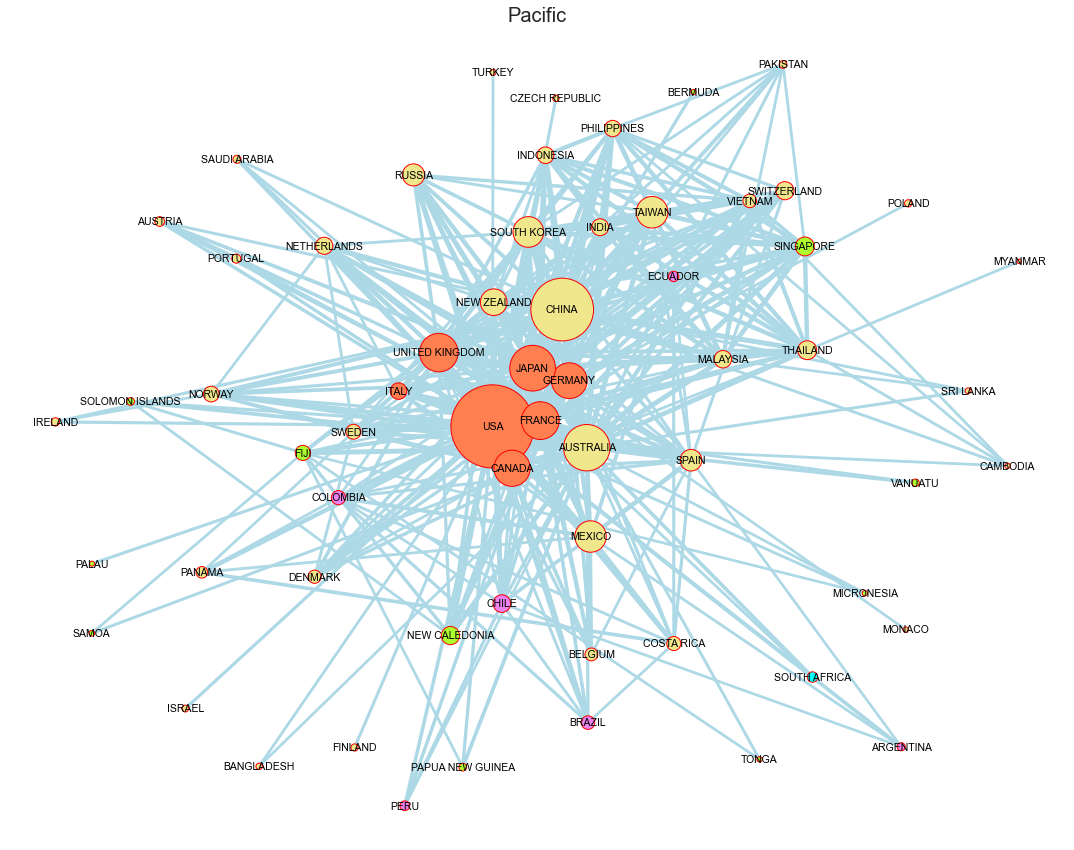

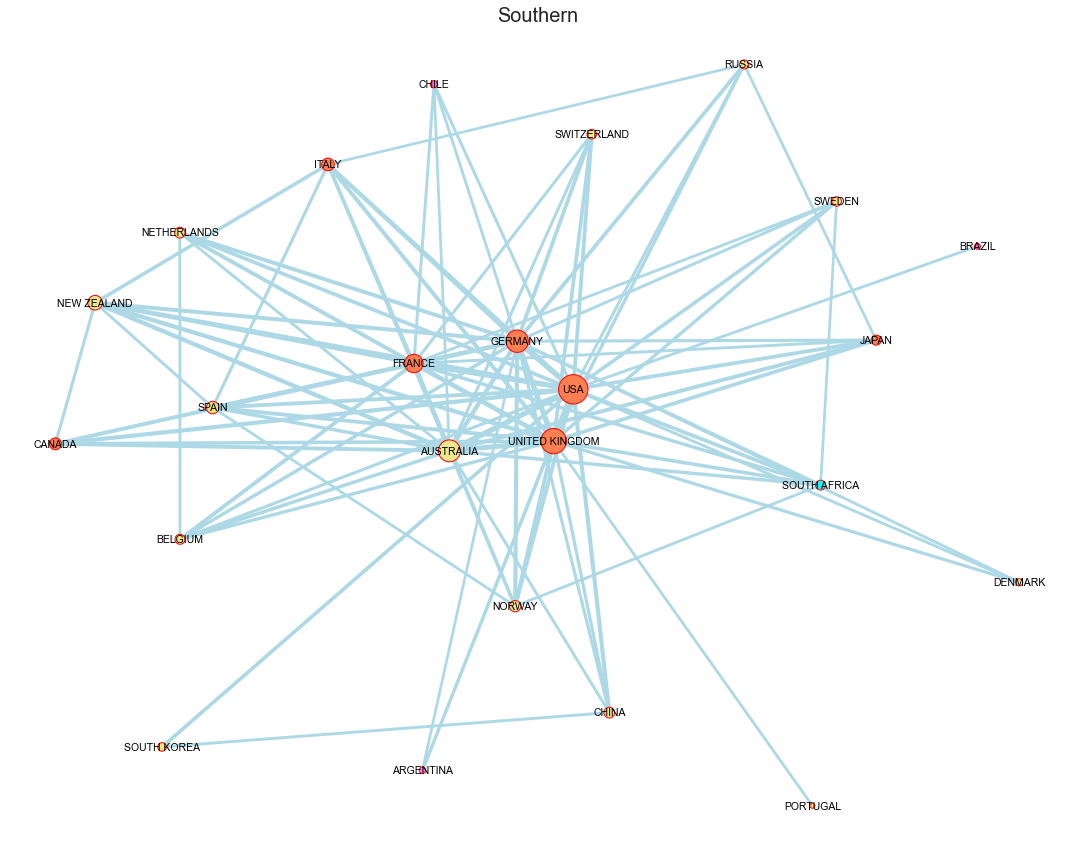

In [217]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from pyvis import network as net

for ocean in ocean_list:

    data = ocean_collaboration_df[(ocean_collaboration_df['collaborating_papers']>=15) & (ocean_collaboration_df['ocean']==ocean)].sort_values(by='main_country')

    g = nx.from_pandas_edgelist(df=data, source='main_country', target='collaborator',edge_attr='collaborating_papers') 

    durations = [i['collaborating_papers'] for i in dict(g.edges).values()]

    labels = [i for i in dict(g.nodes).keys()]

    #NODE SIZE IS THE TOTAL NUMBER OF INTERNATIONAL CCOLLABORATIBVE PAPERS (NOT THE TOTAL TOTAL AS IT EXLUCDES DOMESTIC ARTICLES)
    totpapers = data[['main_country','main_country_total']].drop_duplicates()
    totpapers['main_country'] = pd.Categorical(totpapers.main_country, categories = labels, ordered = True)
    totpapers = totpapers.sort_values(by='main_country')
    d = totpapers.set_index('main_country')['main_country_total'].to_dict()

    labels = {i:i for i in dict(g.nodes).keys()}
    nodesize = [i for i in dict(d).values()]
    
    colors = []
    for node in g:
        if node in sids:
            colors.append("greenyellow")
        elif node in africa_all:
            colors.append("cyan")
        elif node in sam_all:
            colors.append("violet")  
        elif node in g7:
            colors.append("coral")
        else: 
            colors.append("khaki")


    #https://stackoverflow.com/questions/52400380/assign-edge-weights-to-a-networkx-graph-using-pandas-dataframe    
    fig, ax = plt.subplots(figsize=(19,15))
    pos = nx.spring_layout(g,k=0.7, iterations=20)
    nx.draw_networkx_nodes(g, pos, ax = ax, node_color=colors,node_size=nodesize)
    nx.draw_networkx_edges(g, pos, width=np.log(durations), ax=ax,edge_color='lightblue')
    _ = nx.draw_networkx_labels(g, pos, labels, ax=ax,font_size=10.5,font_color='black')
    plt.axis('off')

    ax.collections[0].set_edgecolor("#FF0000") 

    plt.title("{}".format(ocean.title()),fontsize=20)
    plt.savefig("{}.../collab_gt15_{}.eps".format(path,ocean), dpi=300,bbox_inches='tight')
    plt.savefig("{}.../collab_gt15_{}.png".format(path,ocean))
    plt.show()

## Create Supplementary Table 1 - Country summary statistics

In [269]:
nations_df = collaboration_df[collaboration_df['main_country'].isin(country_list)
                             ].sort_values(by=['main_country','collaborating_papers'],ascending=[True,False]).groupby(['main_country']
                                                                                                                     ).head(1).rename(columns={'main_country':'Country'})

nations_df = nations_df.merge(country_counts_by_ocean,left_on='Country',right_on='Country',how='inner').sort_values(
    by=['Country','ocean papers'],ascending=[True,False]).groupby(['Country']).head(1)

nations_df.rename(columns={'main_country_total':'international collaborative papers','collaborator':'main collaborator','collaborating_papers':'collaborating papers',
                                  'perc_x':'collaborator collaboration %','ocean':'main ocean',
                           'ocean papers':'main ocean papers','perc_y':'main ocean % of total output'},inplace=True)

nations_df = nations_df.merge(collab_perc_df[['Country','total collaboration %']],on='Country',how='left')

nations_df = nations_df[['Country', 'total papers','international collaborative papers','total collaboration %',
                                       'main ocean', 'main ocean papers','main ocean % of total output', 
                                        'main collaborator','collaborating papers', 'collaborator collaboration %', ]]

a = (
    allpubs_df.loc[allpubs_df['GERD'].notnull()].sort_values(by='source_year',ascending=False).groupby(['Country']).head(1)#.sort_values(by='source_year',ascending=False)
    [['Country','GERD','source_year']]
)

b = (
    allpubs_df.loc[allpubs_df['researchers per million'].notnull()].sort_values(by='source_year',ascending=False).groupby(['Country']).head(1)#.sort_values(by='source_year',ascending=False)
    [['Country','researchers per million','source_year']]
)

nations_df = nations_df.merge(a,on='Country',how='left').rename(columns={'source_year':'GERD data year'}
                                    ).merge(b,on='Country',how='left').rename(columns={'source_year':'researchers data year'})

nations_df['region'] = np.where(nations_df['Country'].isin(sids),'SIDS','')
nations_df['region'] = np.where(nations_df['Country'].isin(africa_coast),'Africa (coastal)',nations_df['region'])
nations_df['region'] = np.where(nations_df['Country'].isin(central_coast),'Central America',nations_df['region'])
nations_df['region'] = np.where(nations_df['Country'].isin(sam_coast),'South America (coastal)',nations_df['region'])

nations_df.sort_values(by='Country').to_excel('{}.../nations_summary.xlsx'.format(path))
nations_df.sort_values(by='total papers',ascending=False).head(20)


Country  total papers  international collaborative papers  \
189             USA         34512                               16483   
35            CHINA         12932                                5272   
187  UNITED KINGDOM         10292                                7107   
65          GERMANY          7845                                5627   
60           FRANCE          7841                                5619   
30           CANADA          7254                                4278   
86            JAPAN          6828                                3143   
132          NORWAY          6073                                3548   
7         AUSTRALIA          5848                                3999   
23           BRAZIL          4979                                2067   
166           SPAIN          4842                                3379   
147          RUSSIA          4433                                1539   
112          MEXICO          3748                                1700   
78            INDIA          3551                                1232   
84            ITALY          2992                                1962   
123     NETHERLANDS          2499                                1888   
164     SOUTH KOREA          2212                                1294   
173          TAIWAN          1814                                1208   
126     NEW ZEALAND          1791                                1139   
47          DENMARK          1677                                1311   

     total collaboration % main ocean  main ocean papers  \
189                  47.76   atlantic              15606   
35                   40.77    pacific              10703   
187                  69.05   atlantic               6624   
65                   71.73   atlantic               4212   
60                   71.66   atlantic               4466   
30                   58.97   atlantic               4323   
86                   46.03    pacific               5122   
132                  58.42   atlantic               4685   
7                    68.38    pacific               3372   
23                   41.51   atlantic               4643   
166                  69.79   atlantic               3901   
147                  34.72    pacific               1750   
112                  45.36    pacific               2322   
78                   34.69     indian               2894   
84                   65.57   atlantic               2098   
123                  75.55   atlantic               1721   
164                  58.50    pacific               1716   
173                  66.59    pacific               1553   
126                  63.60    pacific               1262   
47                   78.18   atlantic               1221   

     main ocean % of total output main collaborator  collaborating papers  \
189                         45.22             CHINA                  2638   
35                          82.76               USA                  2638   
187                         64.36               USA                  2323   
65                          53.69               USA                  1631   
60                          56.96               USA                  1743   
30                          59.59               USA                  2171   
86                          75.01               USA                  1246   
132                         77.14    UNITED KINGDOM                   879   
7                           57.66               USA                  1390   
23                          93.25               USA                   815   
166                         80.57               USA                   852   
147                         39.48               USA                   460   
112                         61.95               USA                   932   
78                          81.50               USA                   459   
84                          70.12               USA           